<a href="https://colab.research.google.com/github/Smita569/E-commerce_Marketing_and_sales/blob/main/E_commerce_Marketing_and_sales_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✨ E-commerce Marketing and Sales ✨

# Problem Statement 📈

The e-commerce company aims to leverage **data-driven insights** 🧠 to enhance:

*   Customer Acquisition 🤝
*   Customer Retention ✅
*   Revenue Optimization 💰

The following analysis will be conducted to:

*   Understand key business trends 📊
*   Improve decision-making 🤔

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from scipy import stats
from operator import attrgetter
import warnings
warnings.filterwarnings('ignore')

In [3]:
!git clone https://github.com/Smita569/E-commerce_Marketing_and_sales.git

Cloning into 'E-commerce_Marketing_and_sales'...
remote: Enumerating objects: 190, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 190 (delta 72), reused 45 (delta 45), pack-reused 101 (from 1)
Receiving objects: 100% (190/190), 3.03 MiB | 13.83 MiB/s, done.
Resolving deltas: 100% (115/115), done.


In [4]:
# Upload csv files into dataframe

df_customerData = pd.read_csv('E-commerce_Marketing_and_sales/CustomersData.csv')
df_discountCoupon = pd.read_csv('E-commerce_Marketing_and_sales/Discount_Coupon.csv')
df_marketingSpend = pd.read_csv('E-commerce_Marketing_and_sales/Marketing_Spend.csv')
df_onlineSales = pd.read_csv('E-commerce_Marketing_and_sales/Online_Sales.csv')
df_taxAmount=pd.read_csv('E-commerce_Marketing_and_sales/Tax_amount.csv')


In [ ]:
# Read customer data
df_customerData.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [5]:
# Read discount coupon data
df_discountCoupon.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [6]:
# Read marketing spend data
df_marketingSpend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [7]:
# Read online sales data
df_onlineSales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [8]:
# Read tax amount data
df_taxAmount.head()

,Product_Category,GST
0,Nest-USA,10%
1,Office,10%
2,Apparel,18%
3,Bags,18%
4,Drinkware,18%


## 💡 Business questions:

#  Question 1 🤔📊📈📉

1.  **Identify the months with the highest and lowest acquisition rates.** 📈📉 What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year? 🤔✅

In [23]:
# Acquisition Rate Formula
# Acquisition Rate (%) = (Number of New Customers / Estimated Number of Leads) × 100


# Convert 'Transaction_Date' column to datetime objects and extract the year and month
df_onlineSales['Year_Month']=pd.to_datetime(df_onlineSales['Transaction_Date']).dt.to_period('M')

# Sort the DataFrame by 'Year_Month' and keep the first occurrence for each 'CustomerID'
# This identifies the first month each customer made a purchase, indicating their acquisition month.

first_purchase_month = df_onlineSales[['CustomerID','Year_Month']].sort_values(by='Year_Month').drop_duplicates(subset='CustomerID',keep='first')

# Count the number of total customers made transaction in each month (This we will use as leads for acquisition calculation)
total_customers_per_month = df_onlineSales.groupby('Year_Month')['CustomerID'].nunique().reset_index()
total_customers_per_month.columns = ['Year_Month', 'Total_Customers']

# Count the number of new customers acquired in each month
monthly_acquisition = first_purchase_month.groupby('Year_Month').count().reset_index()
monthly_acquisition.columns = ['Year_Month', 'New_Customers']

# Merge total_customers_per_month and monthly_acquisition Dataframe
monthly_acquisition_rate=pd.merge(total_customers_per_month,monthly_acquisition,on='Year_Month')

# Calculate acquisition rate for each month
monthly_acquisition_rate['AcquisitionRate'] = round((monthly_acquisition_rate['New_Customers'] / monthly_acquisition_rate['Total_Customers']) * 100, 2)

# Display the highest and lowest acquisition rate

print(f'Month with the highest acquisition rate: {monthly_acquisition_rate.loc[monthly_acquisition_rate["AcquisitionRate"].idxmax()]["Year_Month"]}')
print(f'Month with the lowest acquisition rate: {monthly_acquisition_rate.loc[monthly_acquisition_rate["AcquisitionRate"].idxmin()]["Year_Month"]}')

Month with the highest acquisition rate: 2019-01
Month with the lowest acquisition rate: 2019-11


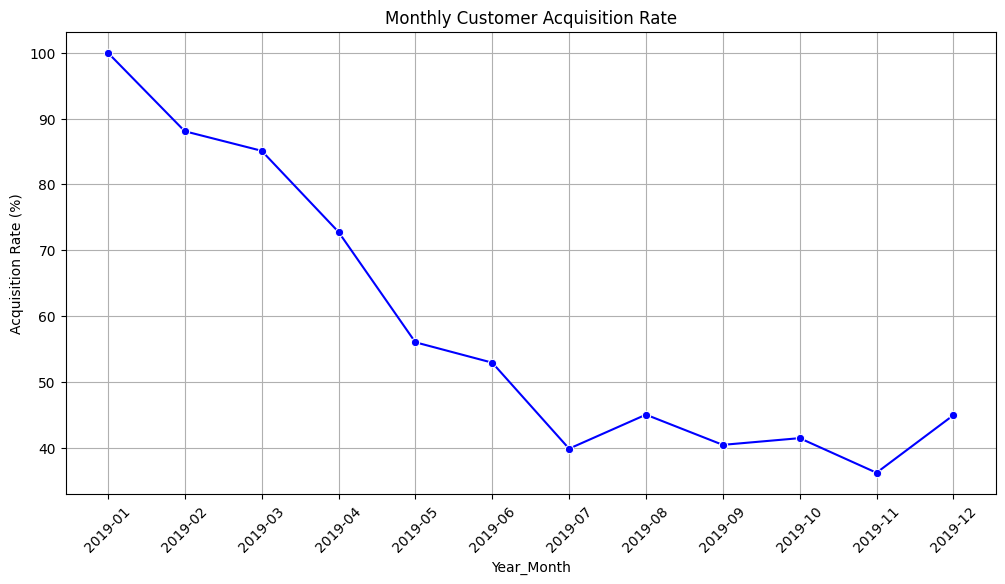

In [22]:
# plot the line plot graph for the above acquisition data
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_acquisition_rate,x=monthly_acquisition_rate['Year_Month'].astype(str), y=monthly_acquisition_rate['AcquisitionRate'],marker='o',color='blue')
plt.title('Monthly Customer Acquisition Rate')
plt.xlabel('Year_Month')
plt.ylabel('Acquisition Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Here are some strategic considerations to address fluctuations and foster consistent growth:**

* Based on the analysis and plot, we've interpreted that the acquisition rate has been decreasing rapidly each month. This is a concerning factor for the business 😟. We need to investigate the underperforming areas that are causing potential customers to lose interest in our service.

* Probably we can start from marketing . This includes examining effectiveness of current marketing strategies. Identify underperforming areas and optimize marketing efforts.

* We can take gather feedbacks from churned customers to understand their concerns .Understand reasons for churn and identify areas for improvement.

* Investigating any quality or service satisfaction issues and assessing the impact of external factors like location.Identify and mitigate any external factors affecting customer acquisition.
 📊🔍💡  


# Question 2 🤔📊📈📉

2.   **Analyze the data** 📊 to determine if **certain months consistently** show higher 📈 or lower acquisition rates 📉. How can the company capitalize on high-performing months 💪 and improve performance during slower periods? 🤔

Refering to the above analysis and plot displayed in Question 1 we can say that :
* **Peak Performance in January** 📈-Acquisition rates peak at the beginning of the month, likely due to post-holiday or post-New Year spending. Consumers often have increased disposable income from bonuses, gifts, or savings, leading to higher spending during this period. This surge presents a prime opportunity for businesses to capitalize on heightened consumer activity.

* **Subsequent Decline** 📉-Then there's a noticeable decline in acquisition rates. This may be due to strong market competition or customer losing interest in our service or it can also be poor marketing efforts.


#**High-Performing Months** 💪
* **Capitalizing on Momentum**:During months exhibiting high customer acquisition rates, we should strategically increase our investment in online marketing channels. This allows us to capitalize on existing market momentum, amplifying our reach and attracting an even larger customer base. 📈💰

* **Amplify Pre-January Marketing**: Don't wait until January 1st! Start your most aggressive and compelling marketing campaigns in late December. Build anticipation and create a strong lead pipeline going into the new year.

* **Customer Engagement**: Utilize personalized messaging to connect with customers and encourage repeat purchases.

* **Innovation and Optimization** 💡 In these periods of strong performance, we have an opportunity to experiment with new online marketing strategies and optimize existing campaigns for maximum impact. By continuously refining our approach, we can sustain high acquisition rates and maximize return on investment. ✨✅

#**Lower-Performing Months** 📉
* **Addressing Slower Periods**: Investing in evergreen content (blog posts, guides, webinars) will attracts organic traffic consistently, regardless of the month.

* **Targeted Strategies** 🎯 While increasing investment, it's essential to develop targeted strategies to understand and address the specific reasons for lower performance in these months. This might involve analyzing consumer behavior, market conditions, or the competitive landscape during these periods. 🤔🔬
* **"Mid-Year Refresh" Campaigns**: Create mini-campaigns during slower months that offer smaller incentives or highlight different aspects of your service.


# Question 3 🤔📊📈📉

3. Identify periods with the **strongest and weakest retention rates**💪📉. What strategies could be **implemented to improve retention** during weaker months?

In [ ]:
# Convert 'Transaction_Date' column to datetime objects and extract the year and month
df_onlineSales['Year_Month']=pd.to_datetime(df_onlineSales['Transaction_Date']).dt.to_period('M')
# Group by 'Year_Month' and count the number of unique customers to get the total number of customers per month
customer_per_month=df_onlineSales.groupby('Year_Month')['CustomerID'].nunique().reset_index()
# Rename the columns for clarity
customer_per_month.columns = ['Year_Month', 'Total_Customers']
# Create a copy of the customer_per_month DataFrame to avoid modifying the original
customer_previous_month=customer_per_month.copy()
# Shift the 'Total_Customers' column by one position to get the previous month's total customers
customer_previous_month['Total_Customers']=customer_previous_month['Total_Customers'].shift(1)
# Remove rows with NaN values (the first month will have NaN after the shift)
customer_previous_month.dropna(inplace=True)
# Convert the 'Total_Customers' column to integer type
customer_previous_month['Total_Customers']=customer_previous_month['Total_Customers'].astype(int)
# Merge the current month's customer count with the previous month's customer count
df_customer_counts_merged = df_customer_counts_merged = pd.merge(
    customer_per_month,
    customer_previous_month,
    on='Year_Month',
    suffixes=('_current', '_previous') # Suffixes to differentiate columns after merging
)

# Merge the DataFrame with customer counts (current and previous month)
df_retention_analysis = pd.merge(
    df_customer_counts_merged,
    monthly_acquisition[['Year_Month', 'New_Customers']],
    on='Year_Month'
)

# Calculate the retention rate for each month.
# Retention Rate = (Total Customers in Current Month - New Customers in Current Month) / Total Customers in Previous Month
# This formula calculates the proportion of customers from the previous month who are still active in the current month.
df_retention_analysis['Retention_rate'] = round(((df_retention_analysis['Total_Customers_current'] - df_retention_analysis['New_Customers']) / df_retention_analysis['Total_Customers_previous'])*100,2)


print(f'Month with the strongest retention rate: {df_retention_analysis.loc[df_retention_analysis["Retention_rate"].idxmax()]["Year_Month"]}')
print(f'Month with the weakest retention rate: {df_retention_analysis.loc[df_retention_analysis["Retention_rate"].idxmin()]["Year_Month"]}')

Month with the strongest retention rate: 2019-08
Month with the weakest retention rate: 2019-02


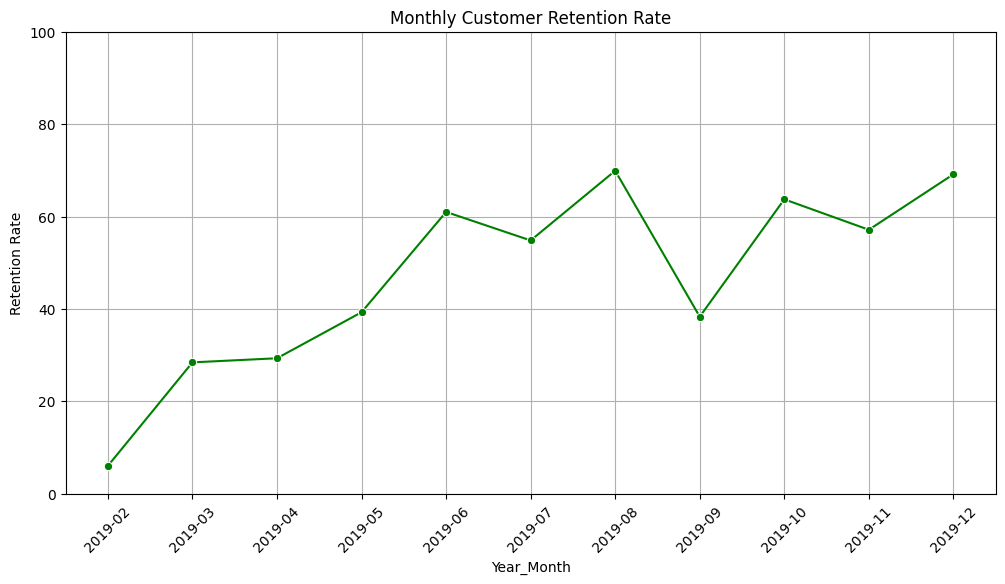

In [ ]:
# Plot lineplot with above given data
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_retention_analysis, x=df_retention_analysis['Year_Month'].astype(str), y='Retention_rate', marker='o', color='green')
plt.title('Monthly Customer Retention Rate')
plt.xlabel('Year_Month')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

Strategies could be implemented to improve retention during weaker months :🤔
1. **Implement a robust Customer** 📊 Conduct targeted surveys, feedback forms, and potentially focus groups during weaker retention periods. The goal is to proactively gather actionable insights into customer pain points, unmet needs, and overall satisfaction levels. This data will inform strategic adjustments to products, services, or customer experience that directly address identified areas for improvement. ✅
2. **Develop and deploy targeted Customer Loyalty and Incentive Programs**: 💰 During months with lower retention, introduce or enhance loyalty programs that reward repeat business. This could include tiered rewards based on purchase frequency or value, exclusive discounts or offers for loyal customers, or early access to new products or promotions. These incentives aim to increase the perceived value of continuing to engage with the company and encourage repeat purchases. 💪



# Question 4 🤔📊📈📉

4. Analyze **customer behavior** during high-retention months and suggest ways to **replicate this success** throughout the year 🤔📈.

In [ ]:
# Analyze is being carried out by month when retention rate was stronger(Aug) and when retention rate was weaker(Feb)
df_onlineSalesCustomer_Merged=pd.merge(df_customerData,df_onlineSales,on='CustomerID')
df_onlineSalesCustomer_Merged['Year_Month']=pd.to_datetime(df_onlineSalesCustomer_Merged['Transaction_Date']).dt.to_period('M')

# Analysis for Aug month (stronger retention)
# Filter data for August 2019
high_retention_month_data_aug = df_onlineSalesCustomer_Merged[df_onlineSales['Year_Month'] == '2019-08'].copy()
high_retention_month_data_aug['Total_Sales'] = high_retention_month_data_aug['Avg_Price'] * high_retention_month_data_aug['Quantity']
# Group by Product_Category and sum total sales to find product sales performance
product_sales_high_retention_aug = high_retention_month_data_aug.groupby('Product_Category')['Total_Sales'].sum().sort_values(ascending=False)

# Group by Location and sum total sales to find location sales performance
location_sales_high_retention_aug = high_retention_month_data_aug.groupby('Location')['Total_Sales'].sum().sort_values(ascending=False)

# Calculate the average number of transactions per customer
purchases_per_customer_high_retention_aug = high_retention_month_data_aug.groupby('CustomerID')['Transaction_ID'].count().mean()
print(f'average number of transactions per customer for Aug(stronger retention rate month): {purchases_per_customer_high_retention_aug}')

# Analysis for Feb month (weaker retention)
# Filter data for February 2019
low_retention_month_data_feb = df_onlineSalesCustomer_Merged[df_onlineSales['Year_Month'] == '2019-02']
low_retention_month_data_feb['Total_Sales'] = low_retention_month_data_feb['Avg_Price'] * low_retention_month_data_feb['Quantity']
# Group by Product_Category and sum total sales to find product sales performance
product_sales_low_retention_feb = low_retention_month_data_feb.groupby('Product_Category')['Total_Sales'].sum().sort_values(ascending=False)

# Group by Location and sum total sales to find location sales performance
location_sales_low_retention_feb = low_retention_month_data_feb.groupby('Location')['Total_Sales'].sum().sort_values(ascending=False)

# Calculate the average number of transactions per customer
purchases_per_customer_low_retention_feb = low_retention_month_data_feb.groupby('CustomerID')['Transaction_ID'].count().mean()
print(f'average number of transactions per customer for Feb(weaker retention rate month): {purchases_per_customer_low_retention_feb}')



average number of transactions per customer for Aug(stronger retention rate month): 34.357541899441344
average number of transactions per customer for Feb(weaker retention rate month): 63.15384615384615


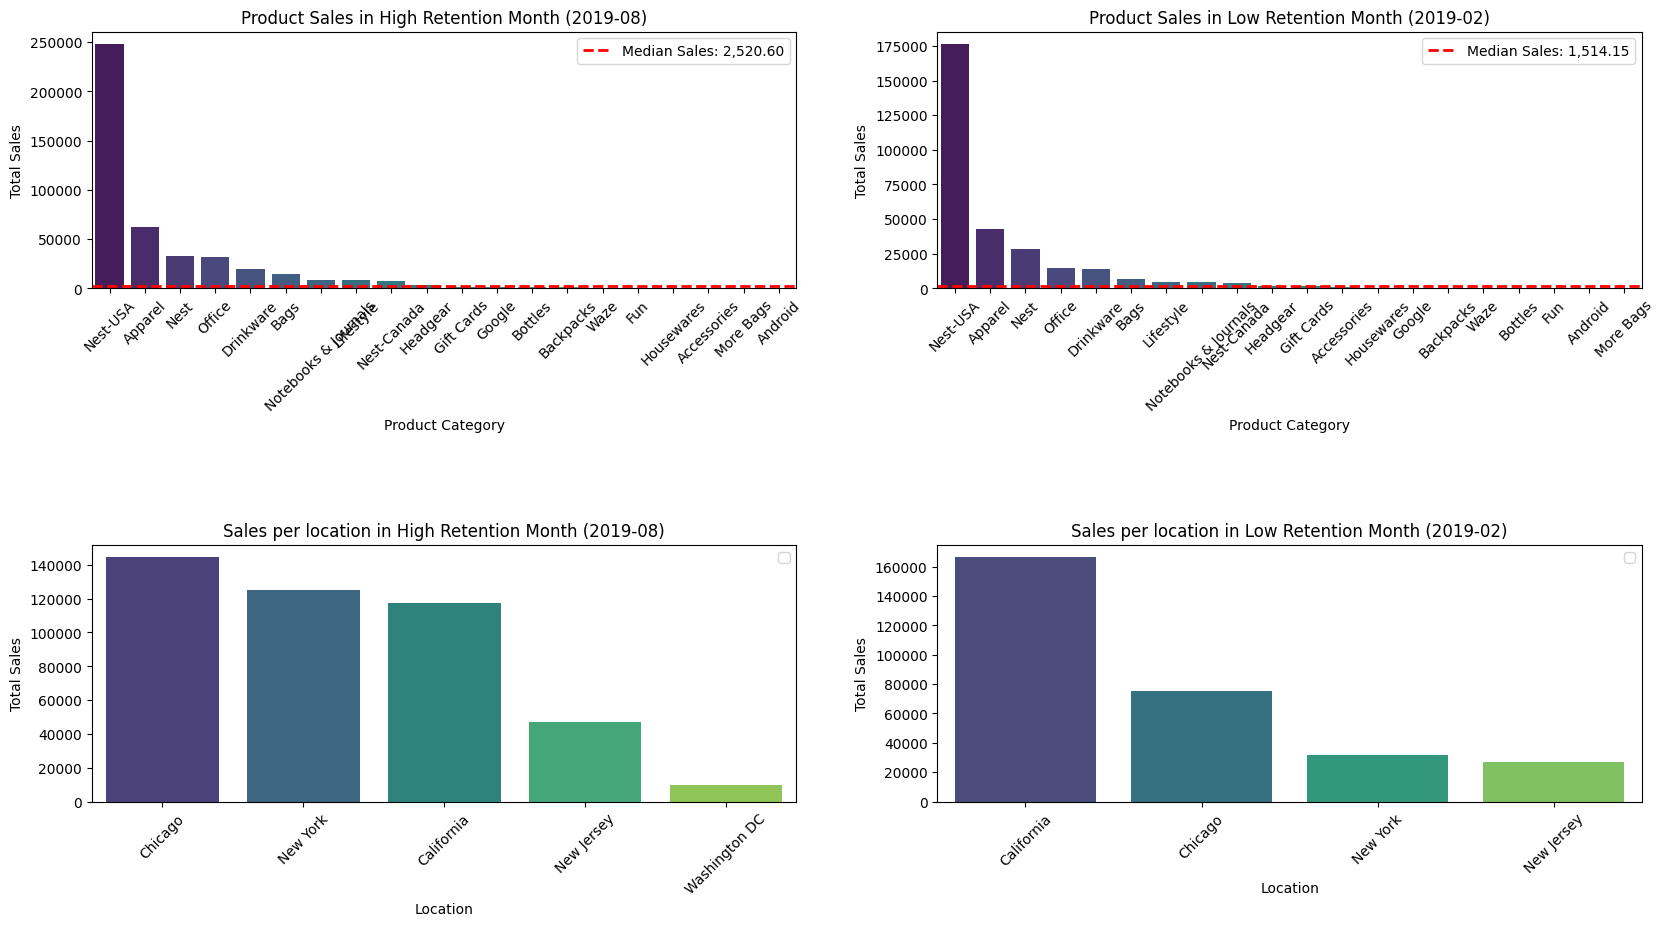

In [ ]:
# Plot from the above data for Product and location analysis for August and February month .

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.barplot(ax=axes[0,0], x=product_sales_high_retention_aug.index, y=product_sales_high_retention_aug.values, palette='viridis')
axes[0,0].set_title('Product Sales in High Retention Month (2019-08)')
axes[0,0].axhline(product_sales_high_retention_aug.median(), color='red', linestyle='dashed', linewidth=2, label=f'Median Sales: {product_sales_high_retention_aug.median():,.2f}')
axes[0,0].set_xlabel('Product Category')
axes[0,0].set_ylabel('Total Sales')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend()


sns.barplot(ax=axes[0,1], x=product_sales_low_retention_feb.index, y=product_sales_low_retention_feb.values, palette='viridis')
axes[0,1].axhline(product_sales_low_retention_feb.median(), color='red', linestyle='dashed', linewidth=2, label=f'Median Sales: {product_sales_low_retention_feb.median():,.2f}')
axes[0,1].set_title('Product Sales in Low Retention Month (2019-02)')
axes[0,1].set_xlabel('Product Category')
axes[0,1].set_ylabel('Total Sales')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend()

fig.subplots_adjust(hspace=1)


sns.barplot(ax=axes[1,0], x=location_sales_high_retention_aug.index, y=location_sales_high_retention_aug.values, palette='viridis')
axes[1,0].set_title('Sales per location in High Retention Month (2019-08)')
axes[1,0].set_xlabel('Location')
axes[1,0].set_ylabel('Total Sales')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend()

sns.barplot(ax=axes[1,1], x=location_sales_low_retention_feb.index, y=location_sales_low_retention_feb.values, palette='viridis')
axes[1,1].set_title('Sales per location in Low Retention Month (2019-02)')
axes[1,1].set_xlabel('Location')
axes[1,1].set_ylabel('Total Sales')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend()


   Based on the behaviors identified in high-retention months, we can implement strategies to replicate this success throughout the year ✨:
1. Geographically Targeted Market Penetration 🗺️: Our analysis indicates lower sales performance in key metropolitan areas including Chicago, New York, and New Jersey during periods of weaker retention. To replicate the success observed in high-retention months, we recommend developing and implementing tailored marketing strategies specifically designed to increase brand awareness, drive customer acquisition, and stimulate sales growth within these identified regions. This focused approach will leverage insights from successful periods to optimize our outreach and engagement efforts in currently underserved markets.
2. In months with high customer retention, customers exhibit higher engagement 💪 and purchase more frequently, leading to significantly higher average product sales and overall sales volume. This highlights a strong correlation between customer loyalty and increased revenue. To replicate this success, the company should prioritize strategies that foster customer loyalty and encourage repeat purchases throughout the year, thereby driving consistent revenue growth. 💰

# Question 5 🤔📊📈📉

5. Compare the **revenue generated** by new and existing customers month-over-month. What does this **trend suggest** about the balance between acquisition and retention efforts?💰📈

In [ ]:
# Revenue generated by existing cutomers
df_onlineSales['Total_Sales'] = df_onlineSales['Avg_Price'] * df_onlineSales['Quantity']
df_sales_with_location =pd.merge(df_onlineSales,df_customerData,on='CustomerID')
df_sales_with_location.sort_values(by='Transaction_Date',inplace=True)

first_purchase_data=df_sales_with_location.groupby('CustomerID')['Transaction_Date'].min().reset_index()
first_purchase_data.rename(columns={'Transaction_Date': 'first_purchase_date'}, inplace=True)

df_sales_with_first_purchase =pd.merge(df_sales_with_location,first_purchase_data,on='CustomerID')

df_sales_with_first_purchase ['first_purchase_month']=pd.to_datetime(df_sales_with_first_purchase ['first_purchase_date']).dt.to_period('M')
df_sales_with_first_purchase ['Year_Month']=pd.to_datetime(df_sales_with_first_purchase ['Transaction_Date']).dt.to_period('M')



In [ ]:
# Check if the first purchase date is the same as the transaction date
# If they are the same, the customer is new for this transaction
# Otherwise, the customer is an existing customer
def calculateCustomerNewOrExisting(row):
  if row['first_purchase_date']==row['Transaction_Date']:
    return 'New'
  else:
    return 'Existing'

In [ ]:
# Apply the 'calculateCustomerNewOrExisting' function to each row of the DataFrame
# The function determines if a customer is 'New' or 'Existing' based on their first purchase date
# The result is stored in a new column called 'Customer_Type'
df_sales_with_first_purchase['Customer_Type']=df_sales_with_first_purchase.apply(calculateCustomerNewOrExisting,axis=1)
monthly_revenue_by_customer_type =df_sales_with_first_purchase.groupby(['Year_Month','Customer_Type'])['Total_Sales'].sum().reset_index()
# resulting DataFrame showing the monthly revenue broken down by customer type
monthly_revenue_by_customer_type.head()

,Year_Month,Customer_Type,Total_Sales
0,2019-01,Existing,72776.87
1,2019-01,New,330847.71
2,2019-02,Existing,175372.42
3,2019-02,New,135447.38
4,2019-03,Existing,180173.15


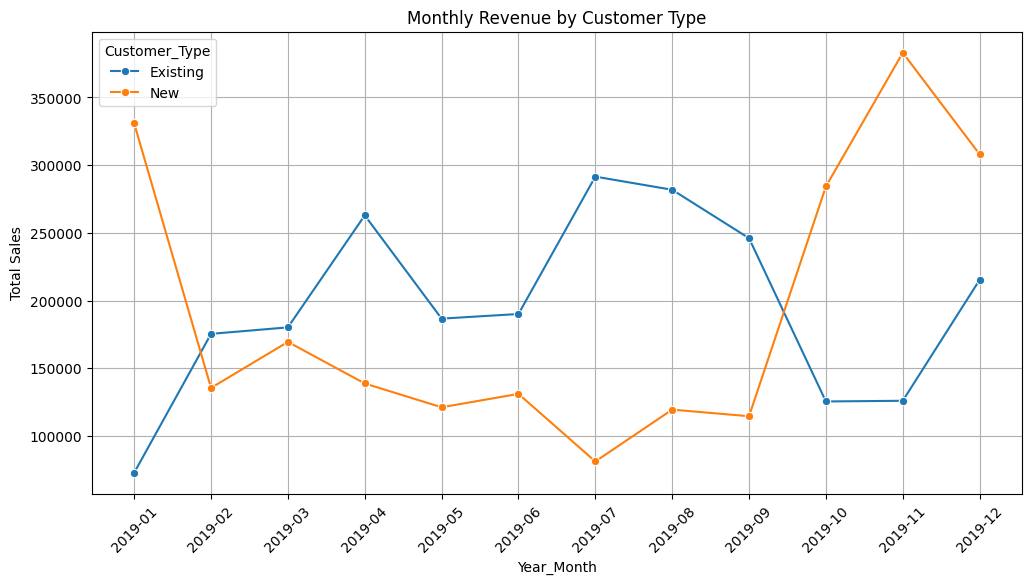

In [ ]:
# plot lineplot for the above monthly_revenue_by_customer_type data
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue_by_customer_type, x=monthly_revenue_by_customer_type['Year_Month'].astype(str), y='Total_Sales', hue='Customer_Type', marker='o')
plt.title('Monthly Revenue by Customer Type')
plt.xlabel('Year_Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Observations on Monthly Revenue by Customer Type: 🤔💰

1. **New Customer Revenue Volatility**: New customer revenue shows significant month-to-month fluctuations. We observe a strong peak in January 📈, followed by a notable drop in February 📉. This pattern of alternating highs and lows continues until September, after which revenue from new customers steadily increases before a dip in December. Understanding the drivers behind this volatility is key to optimizing new customer acquisition strategies.

2. 🎯**Steady Growth in Existing Customer Revenue**: Revenue generated by existing customers starts lower in January but demonstrates a generally upward trend throughout the year ✅. There are slight dips in May-June and October-November, but overall, this segment shows consistent growth and contributes significantly to total revenue. This indicates a solid foundation of loyal customers. 💪

3. **Strong Retention Indicated**: The consistent increase in existing customer revenue, with only minor temporary dips, is a positive sign of good customer retention efforts. This suggests that once acquired, customers tend to stay engaged and continue making purchases. 👍

4. **Acquisition Opportunities and Challenges**: The decrease in new customer acquisition after January and the subsequent significant increase from September onward highlight periods where acquisition efforts may be slowing down or facing challenges. Conversely, the strong performance in January and the later surge indicate months with high acquisition potential. Identifying the factors contributing to these peaks and troughs is crucial for optimizing acquisition spend. 📈

5. **Existing Customers Drive Overall Revenue**: Overall, the revenue generated by existing customers is greater than that from new customers. While this is a positive indicator of retention, it also suggests there might be opportunities to further enhance new customer acquisition strategies to increase their contribution to total revenue. Balancing investment between acquisition and retention is essential for sustainable growth. ⚖️

# Question 6 🤔📊📈📉

6. Analyze the **relationship between coupon usage and revenue generation**. How can discount strategies be optimized to maximize revenue while maintaining profitability? 🤔📊💰

In [ ]:
# dataframe to find the total revenue generated by coupoun status
df_coupon_revenue_relationship=df_sales_with_first_purchase.groupby('Coupon_Status')['Total_Sales'].sum().reset_index()
df_coupon_revenue_relationship

,Coupon_Status,Total_Sales
0,Clicked,2377266.65
1,Not Used,732709.87
2,Used,1560818.10


In [ ]:
# dataframe to find the total revenue genrated by coupon status per month
df_coupon_revenue_relationship_permonth=df_sales_with_first_purchase.groupby(['Coupon_Status','Year_Month'])['Total_Sales'].sum().reset_index()
df_coupon_revenue_relationship_permonth.head()

,Coupon_Status,Year_Month,Total_Sales
0,Clicked,2019-01,213778.52
1,Clicked,2019-02,163136.23
2,Clicked,2019-03,175973.47
3,Clicked,2019-04,205694.41
4,Clicked,2019-05,165642.01


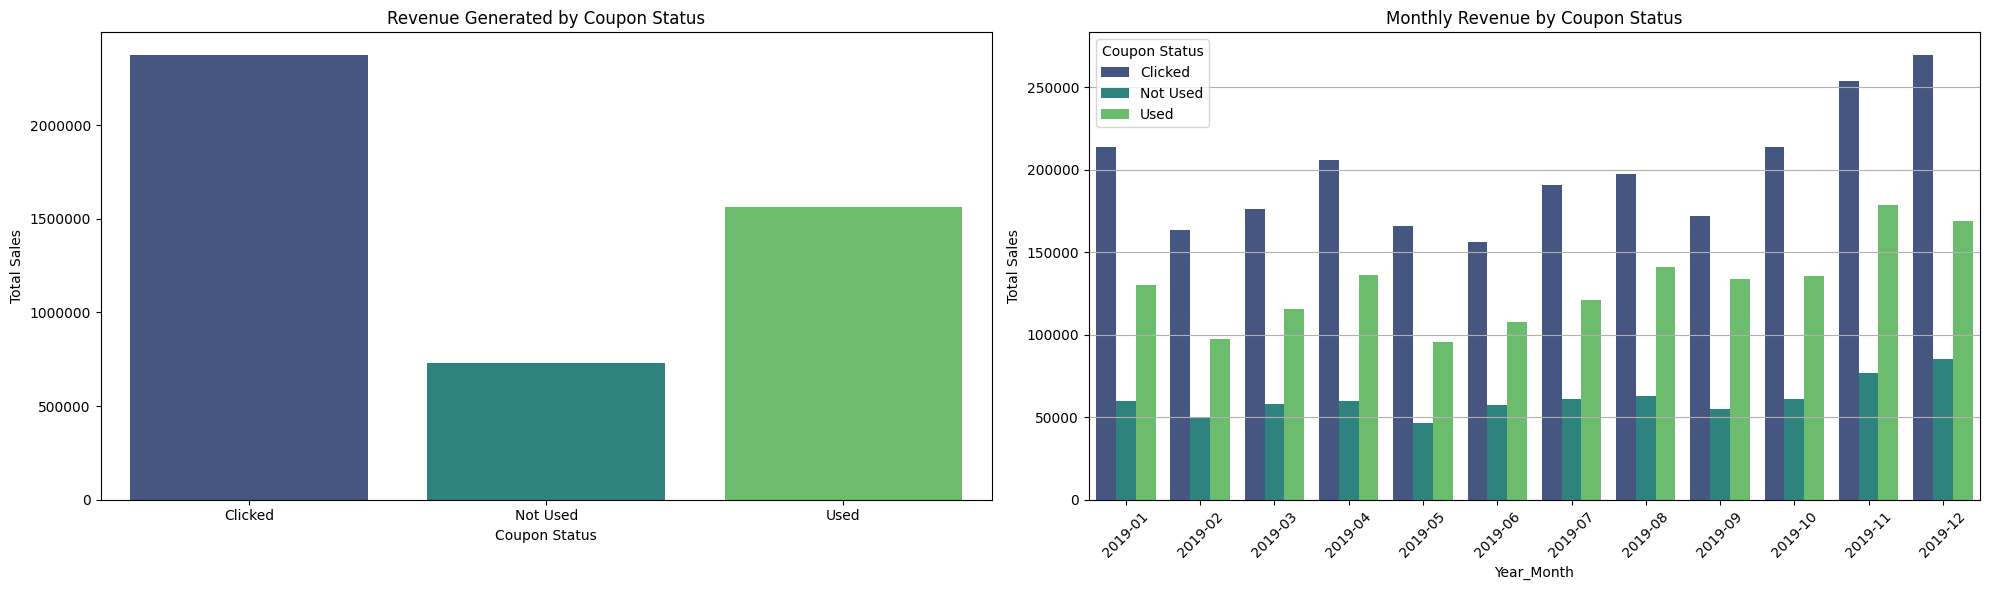

In [ ]:
# Plot the above data to find relationship between revenue generation and coupoun status.

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
formatter = mticker.FormatStrFormatter('%.0f')
sns.barplot(ax=axes[0],data=df_coupon_revenue_relationship, x='Coupon_Status', y='Total_Sales', palette='viridis')
axes[0].set_title('Revenue Generated by Coupon Status')
axes[0].set_xlabel('Coupon Status')
axes[0].set_ylabel('Total Sales')
axes[0].yaxis.set_major_formatter(formatter)

sns.barplot(ax=axes[1], data=df_coupon_revenue_relationship_permonth, x=df_coupon_revenue_relationship_permonth['Year_Month'].astype(str), y='Total_Sales', hue='Coupon_Status', palette='viridis')
axes[1].set_title('Monthly Revenue by Coupon Status')
axes[1].set_xlabel('Year_Month')
axes[1].set_ylabel('Total Sales')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')
axes[1].legend(title='Coupon Status')

plt.tight_layout()
plt.show()

Here are some key observations regarding the relationship between coupon usage and revenue: 🤔💰

1. **Untapped Potential in** "**Not Used**" **Coupons** 📉: As the subplots clearly illustrate, revenue generated from transactions where coupons were "**Not used**" is significantly lower compared to both "**Clicked**" and "**Used**" statuses. This highlights a substantial opportunity to investigate why these coupons are not being utilized and implement strategies to encourage their use to drive incremental revenue. 🎯
2. **Investigating the** "**Clicked**" to "**Used**" **Conversion Gap** 💡: Interestingly, the revenue generated from transactions where coupons were "**Clicked**" is higher than where they were "**Used**." This suggests a potential friction point in the customer journey between intending to use a coupon (clicking) and actually applying it at checkout. We should conduct further analysis and potentially gather customer feedback to identify and address these barriers, thereby converting more "**Clicked**" coupons into revenue-generating "**Used**" transactions. ✅
3. **The Power of Incentives**: "**Used**" Coupons Drive Revenue 💪: The data confirms that transactions where coupons were "**Used**" generate significantly higher revenue compared to those where they were "**Not Used**." This underscores the effectiveness of providing discounts and incentives in driving sales. By strategically offering relevant and attractive discounts, we can encourage more customers to use coupons and thus increase overall revenue. 📈

# Question 7 🤔📊📈📉

7. Identify the **top-performing products** and analyze the **factors driving** their success. How can this insight inform inventory management and promotional strategies?🤔📊📈

In [ ]:
# Top 10 performing products category by total sales
df_top_productCategory=df_sales_with_first_purchase.groupby('Product_Category')['Total_Sales'].sum().reset_index().sort_values(by='Total_Sales',ascending=False)
df_top_productCategory.head(10)

,Product_Category,Total_Sales
16,Nest-USA,2554202.39
2,Apparel,591145.80
14,Nest,518193.50
18,Office,276794.40
6,Drinkware,200707.83
4,Bags,151314.43
17,Notebooks & Journals,107085.96
12,Lifestyle,74385.70
15,Nest-Canada,70910.40
10,Headgear,53471.44


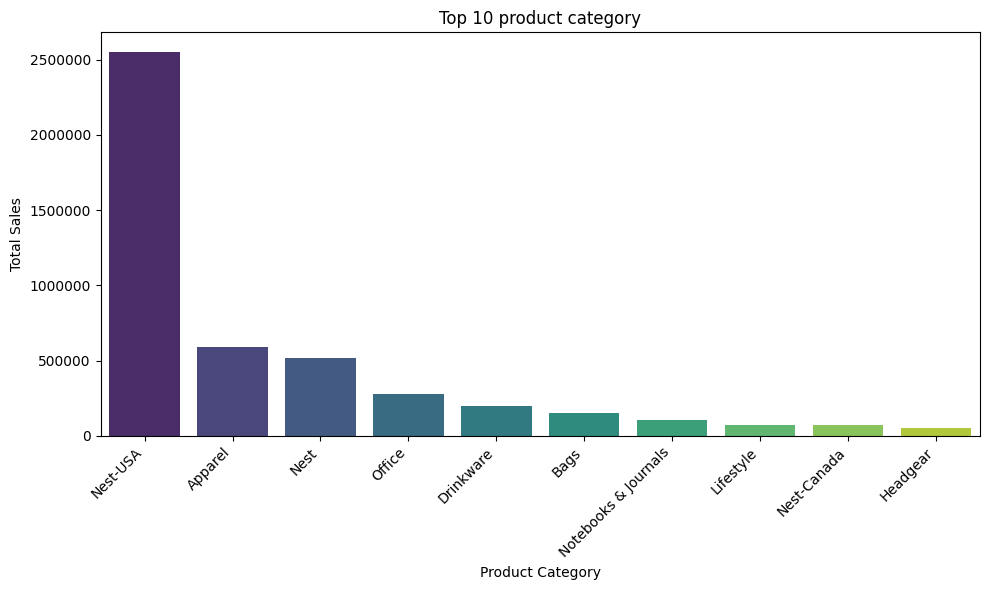

In [ ]:
# Create a bar plot to visualize the top 10 product categories by total sales.

plt.figure(figsize=(10, 6))
formatter = mticker.FormatStrFormatter('%.0f')
sns.barplot(data=df_top_productCategory.head(10), x='Product_Category', y='Total_Sales', palette='viridis')
plt.title('Top 10 product category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

In [ ]:
# Get the location sales for Product category
df_sales_per_location=df_sales_with_first_purchase.groupby(['Product_Category','Location'])['Total_Sales'].sum().reset_index()
df_sales_per_location_group=df_sales_per_location.sort_values(by='Total_Sales',ascending=False)
df_sales_per_location_group

,Product_Category,Location,Total_Sales
81,Nest-USA,Chicago,882041.55
80,Nest-USA,California,764185.84
83,Nest-USA,New York,541561.90
82,Nest-USA,New Jersey,220911.20
11,Apparel,Chicago,214975.27
...,...,...,...
57,Housewares,New Jersey,103.62
7,Android,New Jersey,71.96
4,Accessories,Washington DC,62.31
69,More Bags,Washington DC,17.59


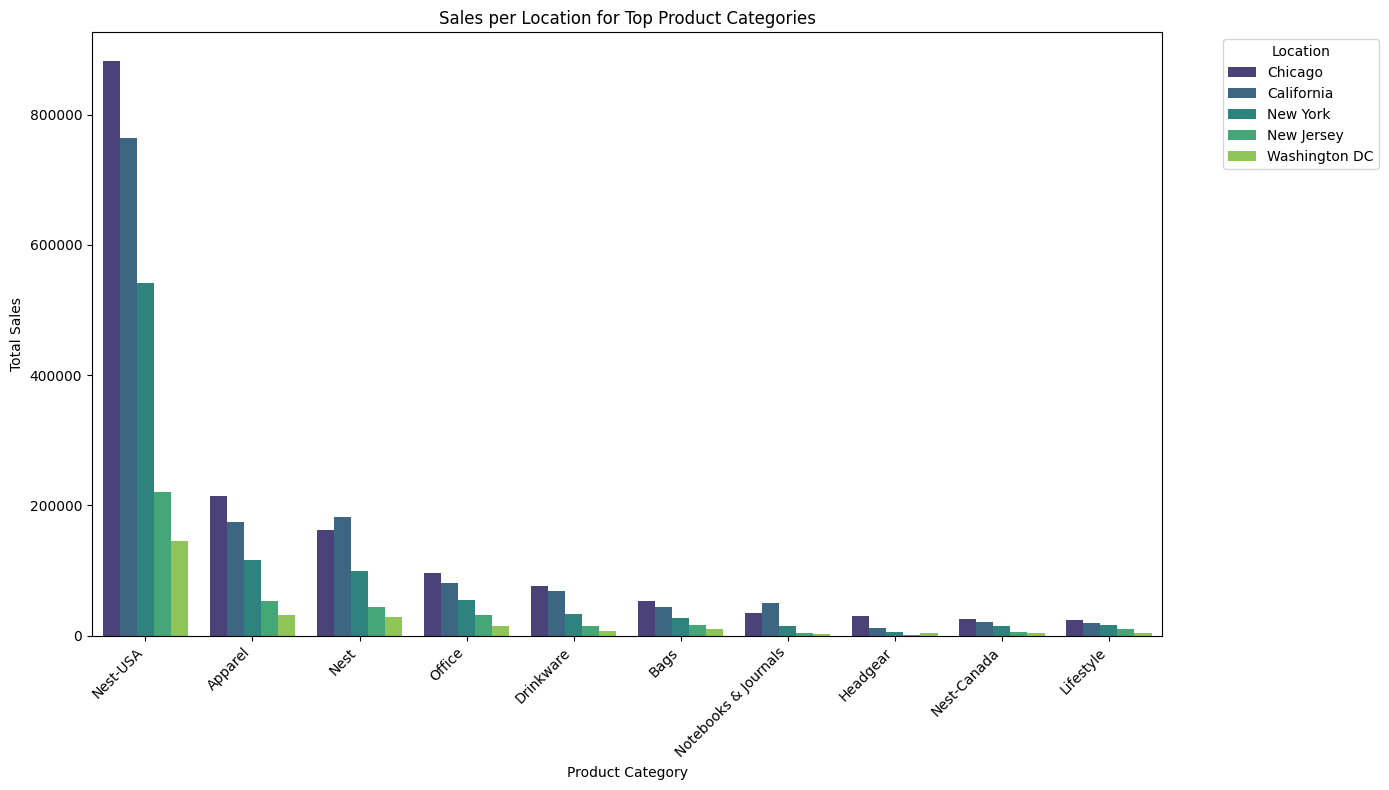

In [ ]:
# plot a bar plot to visualize the sales of product category per location
top_product_categories = df_sales_per_location_group['Product_Category'].unique()[:10]
df_sales_top_categories = df_sales_per_location_group[df_sales_per_location_group['Product_Category'].isin(top_product_categories)]
plt.figure(figsize=(14, 8))
sns.barplot(data=df_sales_top_categories, x='Product_Category', y='Total_Sales', hue='Location', palette='viridis')
plt.title('Sales per Location for Top Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
plt.tight_layout()
plt.show()


1. **Geographic Sales Concentration**: The analysis indicates that location is a significant driver of sales performance for the top 10 product categories. This suggests that demand for these products is not uniform across all regions, and sales are concentrated in specific geographic areas. 🗺️📈

2. **Inventory Management Strategy**: High-performing product categories demonstrate consistent strong sales volume. To avoid stockouts and ensure customer satisfaction, it is crucial to maintain adequate inventory levels for these popular products. An effective inventory management system should be implemented to monitor stock levels and forecast demand based on historical sales data and anticipated trends. 📦✅

3. **Targeted Promotional Campaigns**: To optimize revenue and reach untapped markets, promotional strategies should be tailored to address areas with lower sales for the top product categories. This could involve launching targeted marketing campaigns in these regions, potentially incorporating discounts or special offers on less popular items to stimulate demand and improve overall sales performance. 🎯💰

# Question 8 🤔📊📈📉

8. Analyze the relationship between **monthly marketing spend and revenue**. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?📊💰💡

In [ ]:
# Calculate total monthly sales from the 'df_sales_with_first_purchase' DataFrame.
# This groups the data by 'Year_Month' and sums the 'Total_Sales' for each month.
df_monthly_sales=df_sales_with_first_purchase.groupby(['Year_Month'])['Total_Sales'].sum().reset_index()
# Convert the 'Date' column in the 'df_marketingSpend' DataFrame to datetime objects
# and then extract the year and month, storing it in a new 'Year_Month' column.
df_marketingSpend['Year_Month']=pd.to_datetime(df_marketingSpend['Date']).dt.to_period('M')
# Calculate the total marketing spend for each month by summing 'Online_Spend' and 'Offline_Spend'.
# Store the result in a new column called 'Marketing_Total'.
df_marketingSpend['Marketing_Total']=df_marketingSpend['Online_Spend']+df_marketingSpend['Offline_Spend']
# Calculate the total monthly marketing spend by grouping the 'df_marketingSpend' DataFrame
# by 'Year_Month' and summing the 'Marketing_Total' for each month.
df_monthly_marketingsales=df_marketingSpend.groupby('Year_Month')['Marketing_Total'].sum().reset_index()
# Merge the monthly sales and monthly marketing spend DataFrames based on the 'Year_Month' column.
# This combines the sales and marketing spend data for each month into a single DataFrame.
df_merged_sales_marketingsales=pd.merge(df_monthly_sales,df_monthly_marketingsales,on='Year_Month')
# Calculate the Return on Investment (ROI) for each month.
# ROI is calculated as (Total Sales - Marketing Total) / Marketing Total.
# The result is rounded to two decimal places and stored in a new 'ROI' column
df_merged_sales_marketingsales['ROI']=round(((df_merged_sales_marketingsales['Total_Sales']-df_merged_sales_marketingsales['Marketing_Total'])/df_merged_sales_marketingsales['Marketing_Total']),2)
df_merged_sales_marketingsales

,Year_Month,Total_Sales,Marketing_Total,ROI
0,2019-01,403624.58,154928.95,1.61
1,2019-02,310819.80,137107.92,1.27
2,2019-03,349608.09,122250.09,1.86
3,2019-04,401618.42,157026.83,1.56
4,2019-05,307763.42,118259.64,1.60
5,2019-06,321081.38,134318.14,1.39
6,2019-07,372638.07,120217.85,2.10
7,2019-08,401210.37,142904.15,1.81
8,2019-09,360548.40,135514.54,1.66
9,2019-10,409681.28,151224.65,1.71


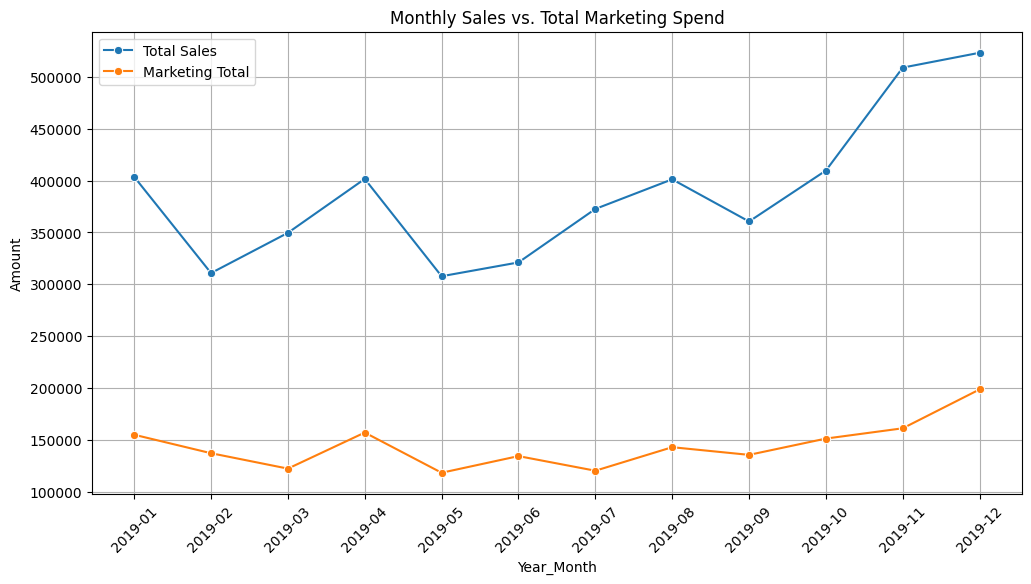

In [ ]:
# plot the lineplot graph to visualize the marketing spend and total sales .
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_merged_sales_marketingsales, x=df_merged_sales_marketingsales['Year_Month'].astype(str), y='Total_Sales', marker='o', label='Total Sales')
sns.lineplot(data=df_merged_sales_marketingsales, x=df_merged_sales_marketingsales['Year_Month'].astype(str), y='Marketing_Total', marker='o', label='Marketing Total')
plt.title('Monthly Sales vs. Total Marketing Spend')
plt.xlabel('Year_Month')
plt.ylabel('Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

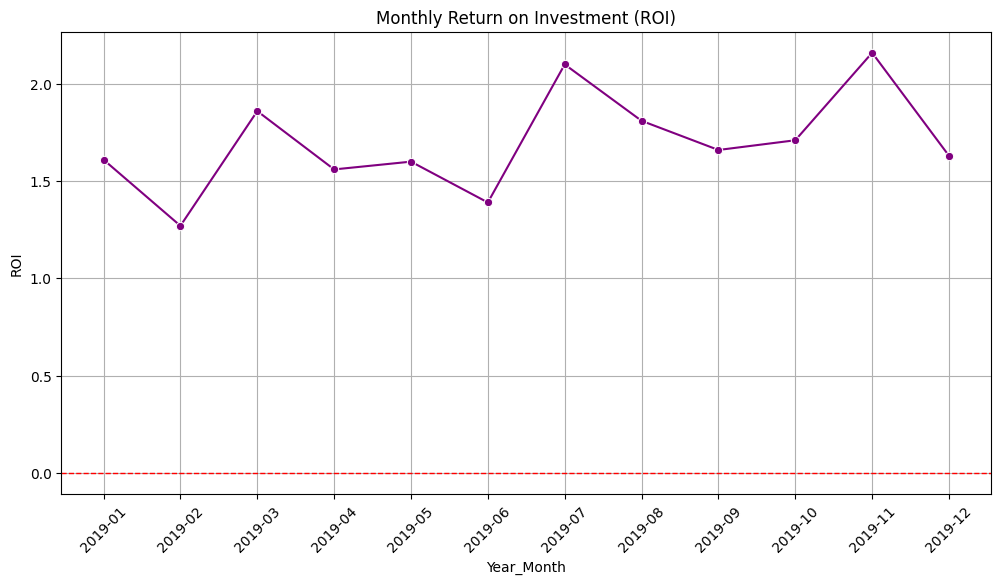

In [ ]:
# plot the lineplot graph to visualize ROI
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_merged_sales_marketingsales, x=df_merged_sales_marketingsales['Year_Month'].astype(str), y='ROI', marker='o', color='purple')
plt.title('Monthly Return on Investment (ROI)')
plt.xlabel('Year_Month')
plt.ylabel('ROI')
plt.grid(True)
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--', linewidth=1) # Add a line at ROI = 0 for reference
plt.show()



* 📈 **Strong ROI Across the Board**: Our analysis clearly shows that the Return on Investment (ROI) for marketing efforts has been consistently positive across all months. This indicates that our marketing spend is effectively generating more revenue than its cost, signifying profitable operations. 💰

* 🚀 **High-Impact Marketing Efforts**: The visual trends observed in the plots demonstrate that our marketing campaigns are yielding high returns. This strong performance is a testament to the effectiveness of our current marketing strategies. 💪

* 🎯 **Maintain Consistency for Future Success**: To sustain this positive momentum and continue driving profitable growth, it is crucial to maintain the consistency and effectiveness of our current marketing approaches in the future. Let's build on this success! ✨




# Question 9 🤔📊📈📉

9. Evaluate the **effectiveness of marketing campaigns** by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results?🤔🎯

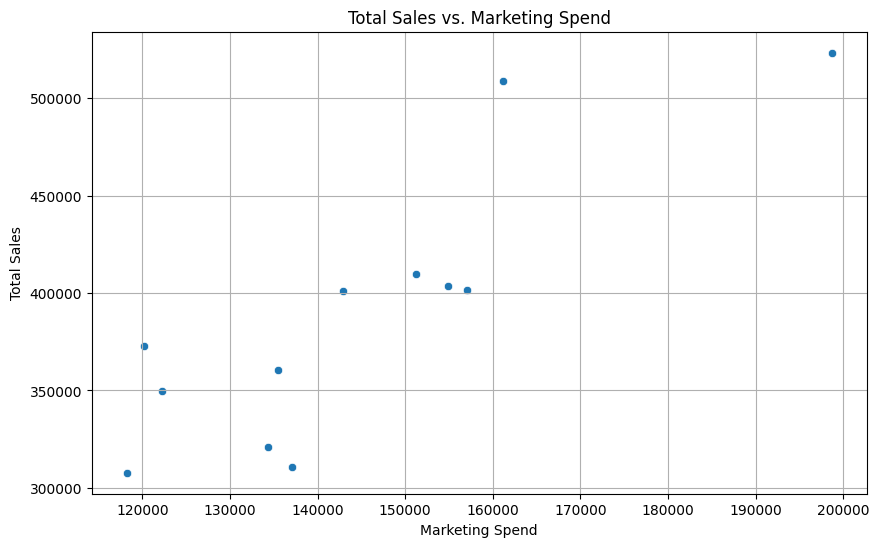

In [ ]:
# plot to visualize the relationship between maketing spend Total sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_sales_marketingsales, x='Marketing_Total', y='Total_Sales')
plt.title('Total Sales vs. Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [ ]:
# The merge is performed on the 'Year_Month' column, combining all relevant monthly data into one DataFrame.
online_offline_spend=df_marketingSpend.groupby('Year_Month')[['Online_Spend','Offline_Spend']].sum().reset_index()
df_merged_sales_marketingsales_online_offline_spend=pd.merge(df_merged_sales_marketingsales,online_offline_spend,on='Year_Month')
df_merged_sales_marketingsales_online_offline_spend

,Year_Month,Total_Sales,Marketing_Total,ROI,Online_Spend,Offline_Spend
0,2019-01,403624.58,154928.95,1.61,58328.95,96600
1,2019-02,310819.80,137107.92,1.27,55807.92,81300
2,2019-03,349608.09,122250.09,1.86,48750.09,73500
3,2019-04,401618.42,157026.83,1.56,61026.83,96000
4,2019-05,307763.42,118259.64,1.60,52759.64,65500
5,2019-06,321081.38,134318.14,1.39,53818.14,80500
6,2019-07,372638.07,120217.85,2.10,52717.85,67500
7,2019-08,401210.37,142904.15,1.81,57404.15,85500
8,2019-09,360548.40,135514.54,1.66,52514.54,83000
9,2019-10,409681.28,151224.65,1.71,57724.65,93500


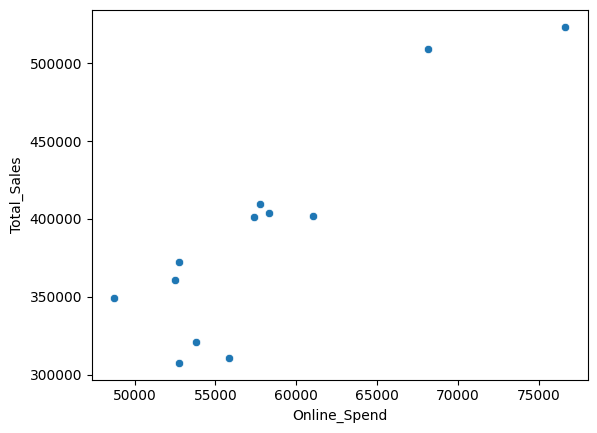

In [ ]:
# Scatter plot to visualize marketing online sales against total sales
sns.scatterplot(x='Online_Spend', y='Total_Sales', data=df_merged_sales_marketingsales_online_offline_spend)
plt.show()

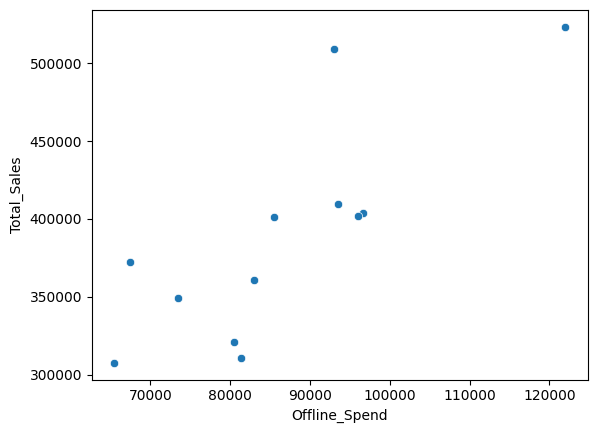

In [ ]:
# Scatter plot to visualize marketing offline sales against total sales
sns.scatterplot(x='Offline_Spend', y='Total_Sales', data=df_merged_sales_marketingsales_online_offline_spend)
plt.show()

* Our analysis of the relationship between marketing spend and total sales reveals a **positive correlation**: increased marketing investment directly corresponds with higher revenue generation 📈💰. This strongly suggests that strategic increases in our marketing budget can drive further revenue growth.

* Considering our current allocation, where offline spend appears to be prioritized over online spend, there is a clear opportunity to optimize resource allocation 🎯. Given the observed positive impact of marketing on sales, increasing investment in both online and offline channels holds the potential to significantly boost overall revenue. Evaluating the return on investment for each channel individually could further inform future reallocation strategies to maximize overall effectiveness and profitability 💪.

# Question 10 🤔📊📈📉

10. Segment customers into **groups** such as Premium, Gold, Silver, and Standard. What targeted **strategies** can be developed for each segment to **improve retention** and revenue? (Use RFM segmentation techniques)

In [ ]:
# Step1 : Calculate RFM(Recency, Frequency, and Monetary) scores for each customer

last_purchase_date=pd.to_datetime(df_onlineSales['Transaction_Date']).max() + pd.Timedelta(days=1)
df_onlineSales['Transaction_Date'] = pd.to_datetime(df_onlineSales['Transaction_Date'])
df_rfm = df_onlineSales.groupby('CustomerID').agg({
    'Transaction_Date': lambda date: (last_purchase_date - date.max()).days,
    'Transaction_ID': 'count',
    'Total_Sales': 'sum'
}).reset_index()
df_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,108,2,30.99
1,12347,60,60,13834.90
2,12348,74,23,1442.12
3,12350,18,17,1360.07
4,12356,108,36,1442.47


In [ ]:
# Step 2: Calculate RFM quartiles
df_rfm['R_score'] = pd.qcut(df_rfm['Recency'], 4, labels=[4, 3, 2, 1]) # Recency: Lower is better, so reverse the labels
df_rfm['F_score'] = pd.qcut(df_rfm['Frequency'], 4, labels=[1, 2, 3, 4])
df_rfm['M_score'] = pd.qcut(df_rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Step 3 : Combine the scores to get the RFM score
df_rfm['RFM_segment'] = df_rfm['R_score'].astype(str) + df_rfm['F_score'].astype(str) + df_rfm['M_score'].astype(str)
df_rfm['RFM_score'] = df_rfm['R_score'].astype(int) + df_rfm['F_score'].astype(int) + df_rfm['M_score'].astype(int)
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_segment,RFM_score
0,12346,108,2,30.99,3,1,1,311,5
1,12347,60,60,13834.90,3,4,4,344,11
2,12348,74,23,1442.12,3,3,2,332,8
3,12350,18,17,1360.07,4,2,2,422,8
4,12356,108,36,1442.47,3,3,2,332,8


In [ ]:
# Define RFM segments based on score ranges
def rfm_segment(rfm_score):
    if rfm_score >= 11:
        return 'Premium' #Recent, frequent, high spenders
    elif rfm_score >= 9 :
        return 'Gold'    #Recent, somewhat frequent and valuable
    elif rfm_score >= 7 :
        return 'Silver'  #Moderate scores across all
    else:
        return 'Standard' #Less recent, infrequent, low spend

In [ ]:
# Step 4 create segment group
df_rfm['segment']=df_rfm['RFM_score'].apply(rfm_segment)
df_rfm['segment'].value_counts()

,count
segment,
Standard,580
Gold,331
Silver,312
Premium,245


**Strategies for Improved Retention and Revenue by Customer Segment**:

Based on the RFM segmentation analysis, tailored strategies can be implemented for each customer group to optimize retention and revenue:

* **Premium Customers**: These are our most valuable customers who exhibit recent, frequent, and high-value transactions. Our strategies should focus on reinforcing their loyalty and maximizing their lifetime value.

* Offer exclusive VIP programs including benefits like complimentary premium shipping 🚚 and early access to new product launches 🚀.
Implement a high-value referral program to incentivize them to bring in new high-quality customers 🤝💰.

* **Gold Customers**: This segment consists of customers who are recent and relatively frequent buyers with good transaction value. The goal is to encourage continued engagement and progression towards the Premium segment.

* Provide early access to promotional sales events or selected product categories before they are available to the general public ⏳🛍️.
Introduce targeted incentives such as small discounts or complimentary items based on their purchase history to encourage repeat business ✨🎁.

* **Silver Customers**: This segment represents customers with moderate RFM scores. Strategies should aim to increase their frequency and monetary value.

* Proactively solicit feedback through surveys or direct outreach to identify pain points and areas for service or product enhancement 🗣️💡.
Deploy targeted promotional offers, such as special discounts, free shipping thresholds, or bundled product deals, to encourage more frequent or higher-value transactions 🎯💲.

* **Standard Customers**: This segment includes customers with lower RFM scores, indicating less recent, infrequent, and low-value purchases. The focus is on re-engaging these customers and encouraging initial or subsequent purchases.

* Offer a compelling introductory discount or incentive on their next purchase to stimulate activity and encourage re-engagement 🌱🛒.
Communicate recent product innovations, service enhancements, or new offerings that may resonate with their interests and re-ignite their engagement 🔥🆕.

# Question 11 🤔📊📈📉

11. Analyze the **revenue contribution** of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?💰📊

In [ ]:
# Merge RFM data with online sales and calculate total sales per customer segment.
df_merged_rfm_customer_data=pd.merge(df_rfm,df_onlineSales,on='CustomerID')
df_merged_rfm_customer_data_grp=df_merged_rfm_customer_data.groupby('segment')['Total_Sales'].sum().sort_values(ascending=False).reset_index()
df_merged_rfm_customer_data_grp

,segment,Total_Sales
0,Premium,2328563.02
1,Gold,1384540.26
2,Silver,591519.75
3,Standard,366171.59


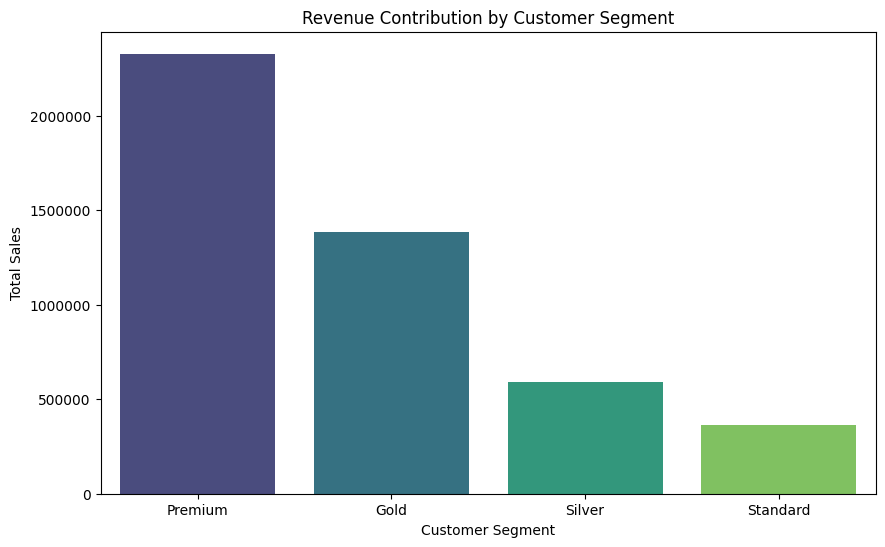

In [ ]:
# Create a bar plot to visualize the revenue contribution of each customer segment.
plt.figure(figsize=(10, 6))
formatter = mticker.FormatStrFormatter('%.0f')
sns.barplot(data=df_merged_rfm_customer_data_grp, x='segment', y='Total_Sales', palette='viridis', order=df_merged_rfm_customer_data_grp['segment'])
plt.title('Revenue Contribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

**Strategies for High-Value Customer Segments (Premium & Gold)** ✨💰:

* **Elevated Engagement and Personalization**: Implement advanced personalization engines to provide tailored product recommendations based on their purchase history and browsing behavior. This upsell and cross-sell strategy aims to increase average order value and customer lifetime value. 🎯🛍️

* **Priority Support Channels**: Offer dedicated customer support channels (e.g., dedicated phone line, live chat with priority queuing) to provide swift and efficient resolution of their inquiries, enhancing their overall brand experience. 📞✅

* **Exclusive Loyalty Recognition**: Implement a multi-tiered loyalty program that offers exclusive rewards, early access to new arrivals, special promotions, and opportunities to provide feedback through VIP surveys or focus groups, fostering a sense of belonging and appreciation. 🏆🎁

* **Incentivized Referrals**: Launch a premium referral program with enhanced rewards for both the referrer and the referred customer, leveraging the influence of our most loyal customers to attract similar high-value individuals. 🤝📈

**Strategies for Nurturing Lower-Value Customer Segments (Silver & Standard)** 🌱📊:

* **Targeted Re-engagement Campaigns**: Analyze customer behavior to identify patterns and preferences within these segments. Develop targeted marketing campaigns with personalized offers and promotions designed to re-engage dormant customers and encourage repeat purchases. 💌💲

* **Value-Driven Communication**: Highlight the value proposition of our products and services through targeted content marketing, showcasing benefits and use cases relevant to their identified needs and behaviors. This aims to educate and inspire increased engagement. 💡📖

* **Referral Program with Incremental Rewards**: Introduce a referral program with escalating rewards based on the number of successful referrals, incentivizing these customers to become advocates and gradually contribute more to our growth. 📈🤝

# Question 12 🤔📊📈📉

12. Group customers by their **month of first** purchase and analyze **retention rates over time**. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?🤔💡

In [ ]:
# cohort analysis
# Step 1 : prepare data which include first purchase month year that would be cohort month year and order data month year
df_cohort_analysis_data=df_sales_with_first_purchase[['CustomerID','first_purchase_month','Year_Month']].drop_duplicates()
df_cohort_analysis_data.columns=['CustomerID','Cohort_Month','Transaction_Month']
df_cohort_analysis_filtered_data=df_cohort_analysis_data[df_cohort_analysis_data['Transaction_Month']>=df_cohort_analysis_data['Cohort_Month']]
# Step2: Get the Cohort index which is the difference between order month year and cohort month year
df_cohort_analysis_filtered_data['cohort_index'] = (df_cohort_analysis_filtered_data['Transaction_Month'] - df_cohort_analysis_filtered_data['Cohort_Month']).apply(attrgetter('n'))
# Step 3 : Prepare a pivot table
cohort_data = df_cohort_analysis_filtered_data.groupby(['Cohort_Month', 'cohort_index'])['CustomerID'].nunique().unstack(0)
# Step 4 : Divide the coloumn 0 with the other rowise
cohort_sizes = cohort_data.loc[0]
retention = cohort_data.divide(cohort_sizes, axis=1).round(3)


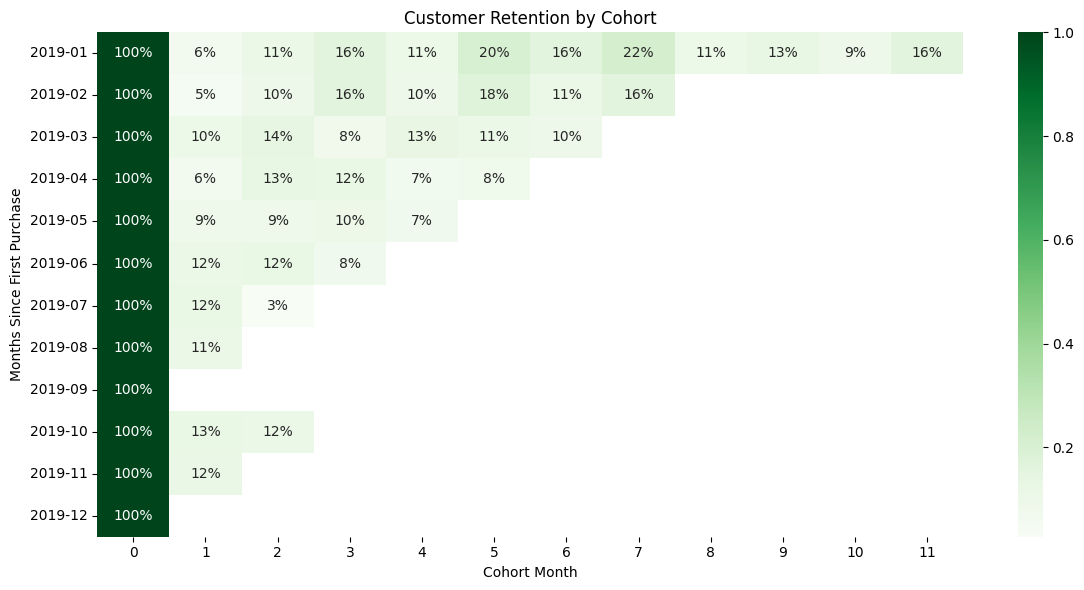

In [ ]:
# Visualise the above data as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(retention.T, annot=True, fmt='.0%', cmap='Greens', cbar=True)
plt.title('Customer Retention by Cohort')
plt.xlabel('Cohort Month')
plt.ylabel('Months Since First Purchase')
plt.tight_layout()
plt.show()




From the above heatmap we see that for **weak retention rate is around 2019-09** and **strong seems to be in 2019-01.**

**Key Findings**:

**Customer Retention Challenge**: The analysis indicates a significant challenge in customer retention, with the company failing to retain over more than 50% of customers.
* This is a **critical area** requiring immediate and focused attention. 🚨
Urgent Need for Retention Strategies: The low retention rate presents a high-priority alarm. Implementing effective strategies to strengthen customer retention is paramount for sustainable business growth. 💪

**Recommended Strategies for Improved Retention**:

* **Onboarding and Value Reinforcement**: Within the first week of a customer's initial purchase, proactively reinforce the value and benefits of our products. This can be achieved through targeted communications, educational content, or personalized follow-ups to ensure a positive early experience and build a strong foundation for long-term engagement. ✅

* **Identify and Address Friction Points**: Implement a systematic approach to gather customer feedback through surveys and direct outreach. The objective is to identify any friction points or pain points in the customer journey that may contribute to churn. Analyzing this feedback will enable us to make data-driven improvements to the customer experience. 📊💡

* **Re-Engagement Campaigns**: Develop targeted re-engagement campaigns for inactive users. This can involve utilizing push notifications and email nudges with personalized messaging and incentives to encourage them to return and make repeat purchases. 🎯📧

* **Strategic Marketing and Promotional Programs**: Implement a comprehensive marketing strategy that incorporates engaging campaigns and exciting deals. This can include organizing themed sales events, such as "Tuesday Bumper Sale," "Wednesday Sale," or "Festive Sales," to attract customer attention, create urgency, and incentivize purchases. By strategically combining strong marketing with compelling offers, we can drive both acquisition and retention. 💰🎉


# Question 13 🤔📊📈📉

13. Analyze the **lifetime value** of customers acquired in different months. How can this insight inform **acquisition and retention strategies**?🎯💰

In [ ]:
# taking relevant columns useful for analysis from df_sales_with_first_purchase
df_customer_LV_data=df_sales_with_first_purchase[['CustomerID','first_purchase_month','Year_Month','Total_Sales']]
# group customerid and take the sum for total sales
customer_ltv = df_customer_LV_data.groupby('CustomerID')['Total_Sales'].sum().reset_index()
# merge the data
customer_ltv = pd.merge(customer_ltv, df_customer_LV_data[['CustomerID', 'first_purchase_month']], on='CustomerID', how='left')
# Calculate the average 'Total_Sales' for each 'first_purchase_month'
monthly_ltv = customer_ltv.groupby('first_purchase_month')['Total_Sales'].mean().reset_index()
# Sort the results by 'first_purchase_month'
monthly_ltv = monthly_ltv.sort_values(by='first_purchase_month')
monthly_ltv.head()

,first_purchase_month,Total_Sales
0,2019-01,22388.760874
1,2019-02,8533.765755
2,2019-03,5148.040775
3,2019-04,4589.820740
4,2019-05,4510.352664


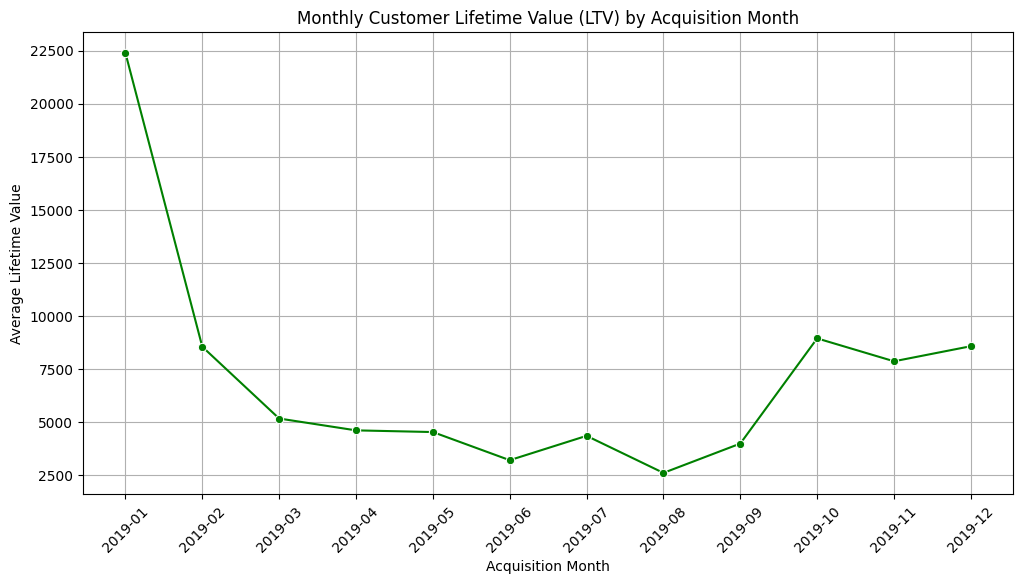

In [ ]:
# visualise the monthly_ltv data using lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_ltv, x=monthly_ltv['first_purchase_month'].astype(str), y='Total_Sales', marker='o', color='green')
plt.title('Monthly Customer Lifetime Value (LTV) by Acquisition Month')
plt.xlabel('Acquisition Month')
plt.ylabel('Average Lifetime Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Based on the analysis of Customer Lifetime Value (CLTV) by acquisition month: 🤔💰

* **CLTV Performance**: We observe the highest CLTV for customers acquired in January 📈, while August shows the lowest 📉. A concerning trend is the decrease in CLTV after January, which requires strategic intervention. 🚨

* **Acquisition Strategy Insights**:
    * **Replicate January's Success**: Investigate the marketing strategies and campaigns implemented in January that contributed to high new customer acquisition and CLTV. 🎯 Implement similar approaches in other months to boost performance. 💪
    * **Identify and Discontinue Low-CLTV Drivers**: Analyze the factors that led to lower CLTV in subsequent months and discontinue those approaches. 📉
    * **Location and Discount Analysis**: Further analyze how location and discount strategies influenced CLTV. This will inform targeted campaigns for higher and lower CLTV segments. 🗺️💰
    * **Seasonal Impact**: Investigate whether seasonal factors like holidays, festivals, or school reopenings affect CLTV. Adjust strategies based on these seasonal trends. 🗓️🎉📚✏️

* **Retention Strategies**: We have already outlined comprehensive strategies for improving customer retention in the previous analysis. ✅ Continue to implement and refine these strategies to nurture existing customers and increase their lifetime value. 🌱📈

# Question 14 🤔📊📈📉

14. Do customers who use **coupons** have a **different average transaction** value compared to those who do not?
*  Conduct a **statistical test** to validate this hypothesis. What implications does this have for the company’s discount and coupon strategies?📈

In [ ]:
# H0 (null hypothesis) -  coupons have same average transaction
# Ha (alternate hypothesis) - coupon have different average transaction

# prepare dataset for two independent groups(coupon used and coupon not used)
coupon_used_data=df_sales_with_first_purchase[df_sales_with_first_purchase['Coupon_Status']=='Used']['Total_Sales']
coupon_not_used_data=df_sales_with_first_purchase[df_sales_with_first_purchase['Coupon_Status']=='Not Used']['Total_Sales']

# Display basic statistics for both groups
print("Coupon Used Statistics:")
print(coupon_used_data.describe())
print("\nCoupon Not-Used Statistics:")
print(coupon_not_used_data.describe())

# Sample sizes
n1 = len(coupon_used_data)
n2 = len(coupon_not_used_data)

# Sample means
mean1 = coupon_used_data.mean()
mean2 = coupon_not_used_data.mean()

# Sample standard deviations
std1 = coupon_used_data.std(ddof=1)
std2 = coupon_not_used_data.std(ddof=1)

# Display the calculated values
print(f"Coupon Used - Mean: {mean1:.2f}, Standard Deviation: {std1:.2f}, Sample Size: {n1}")
print(f"Coupon Not-Used - Mean: {mean2:.2f}, Standard Deviation: {std2:.2f}, Sample Size: {n2}")

# Perform Levene's Test for equality of variances
levene_stat, levene_p = stats.levene(coupon_used_data, coupon_not_used_data)
print(f"Levene's Test Statistic: {levene_stat:.4f}")
print(f"Levene's Test P-Value: {levene_p:.4f}")

# Determine if variances are equal
equal_var = True if levene_p > 0.05 else False
print(f"Equal Variances Assumed: {equal_var}")

# Perform Two-Sample T-Test
# This test compares the means of two independent groups.
t_stat, p_val = stats.ttest_ind(coupon_not_used_data, coupon_not_used_data, equal_var=equal_var)
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")



Coupon Used Statistics:
count    17904.000000
mean        87.177061
std        172.507097
min          0.400000
25%         11.750000
50%         30.000000
75%        121.300000
max      10512.390000
Name: Total_Sales, dtype: float64

Coupon Not-Used Statistics:
count    8094.000000
mean       90.525064
std       173.384624
min         0.400000
25%        11.950000
50%        30.390000
75%       121.300000
max      5996.000000
Name: Total_Sales, dtype: float64
Coupon Used - Mean: 87.18, Standard Deviation: 172.51, Sample Size: 17904
Coupon Not-Used - Mean: 90.53, Standard Deviation: 173.38, Sample Size: 8094
Levene's Test Statistic: 2.1980
Levene's Test P-Value: 0.1382
Equal Variances Assumed: True
T-Statistic: 0.0000
P-Value: 1.0000


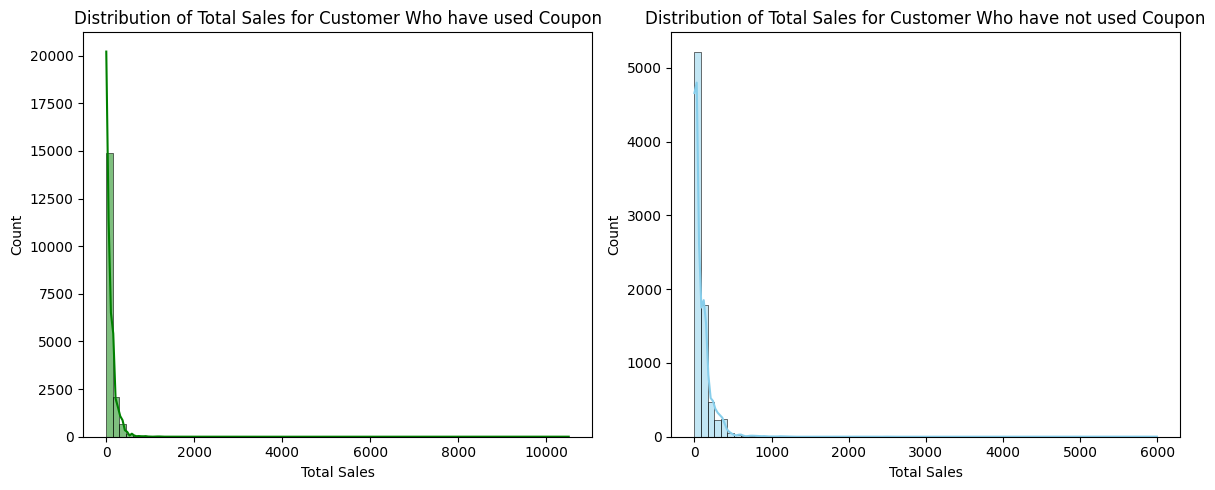

In [ ]:
## Visualizing the Difference in coupon used and not used average transaction

# Histogram
plt.figure(figsize=(12, 5))

# Histogram for Customer who have used coupon
plt.subplot(1, 2, 1)
sns.histplot(coupon_used_data, bins=70, kde=True, color='green')
plt.title('Distribution of Total Sales for Customer Who have used Coupon')
plt.xlabel('Total Sales')

# Histogram for Customer who have not used coupon
plt.subplot(1, 2, 2)
sns.histplot(coupon_not_used_data, bins=70, kde=True, color='skyblue')
plt.title('Distribution of Total Sales for Customer Who have not used Coupon')
plt.xlabel('Total Sales')

plt.tight_layout()
plt.show()

**Decision**:

* **Levene's Test**: Since p-value (0.1382) > 0.05, we assume equal variances.

* **T-Test**: Since p-value (1.0000) > 0.05, we fail to reject the null hypothesis (H₀).

**Conclusion:**
- There is **insufficient evidence** to conclude that there is a **significant difference** in the average transaction of coupon used by the customer .
- **Business Implication:**
* **Strategic Re-evaluation of Coupon Programs**: We recommend a comprehensive review of the existing coupon strategy. This could involve experimenting with various discount types (e.g., percentage off, fixed amount off, buy-one-get-one offers), adjusting the discount thresholds, or targeting specific customer segments with tailored promotions. 🎯 The goal is to identify strategies that demonstrably influence purchasing behavior and drive higher transaction values. 💰
* **Deeper Analysis of Revenue Drivers**: Given the limited impact of the current coupon strategy on average transaction value, it's crucial to investigate other key factors that influence sales performance. This includes analyzing product demand patterns, evaluating the effectiveness of marketing campaigns across different channels, assessing pricing strategies, and optimizing the website's user experience to reduce friction points and encourage larger purchases. 💡 By understanding the true drivers of revenue, we can reallocate resources and refine our overall sales and marketing efforts for greater impact. 💪

# Question 15 🤔📊📈📉

15. Do **purchase behaviors** (e.g., order frequency, order value) vary significantly across different demographic groups or pricing factors (e.g., delivery charges)?
* Test for differences in purchase behavior across locations, age groups, or delivery charge tiers. How can these insights inform **personalized marketing and pricing strategies**?🚀

In [ ]:
# Analyzing the purchase behaviour by location
# Perform ANOVA test for order frequency across locations

# Calculate order frequency for each customer
customer_order_frequency = df_sales_with_first_purchase.groupby('CustomerID')['Transaction_ID'].count().reset_index()
customer_order_frequency.rename(columns={'Transaction_ID': 'Order_Frequency'}, inplace=True)

# Merge with customer data to get location
customer_frequency_location = pd.merge(customer_order_frequency, df_customerData[['CustomerID', 'Location']], on='CustomerID')

# Create a list of order frequencies for each location
locations = customer_frequency_location['Location'].unique()
location_frequencies = [customer_frequency_location[customer_frequency_location['Location'] == loc]['Order_Frequency'] for loc in locations]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*location_frequencies)

print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"ANOVA P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The ANOVA test is statistically significant (p < 0.05). There are significant differences in order frequency across locations.")
else:
    print("The ANOVA test is not statistically significant (p >= 0.05). There are no significant differences in order frequency across locations.")

ANOVA F-statistic: 1.4387
ANOVA P-value: 0.2188
The ANOVA test is not statistically significant (p >= 0.05). There are no significant differences in order frequency across locations.


In [ ]:
# Analyzing the purchase behaviour by location
# Perform ANOVA test for order value(sales) across locations

# Calculate order value for each customer
customer_order_value = df_sales_with_first_purchase.groupby('CustomerID')['Total_Sales'].sum().reset_index()
customer_order_value.rename(columns={'Total_Sales': 'Order_Value'}, inplace=True)

# Merge with customer data to get location
customer_order_location = pd.merge(customer_order_value, df_customerData[['CustomerID', 'Location']], on='CustomerID')

# Create a list of order values for each location
locations = customer_order_location['Location'].unique()
location_sales = [customer_order_location[customer_order_location['Location'] == loc]['Order_Value'] for loc in locations]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*location_sales)

print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"ANOVA P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The ANOVA test is statistically significant (p < 0.05). There are significant differences in order values across locations.")
else:
    print("The ANOVA test is not statistically significant (p >= 0.05). There are no significant differences in order values across locations.")

ANOVA F-statistic: 1.2536
ANOVA P-value: 0.2863
The ANOVA test is not statistically significant (p >= 0.05). There are no significant differences in order values across locations.


In [ ]:
# Analyzing the purchase behaviour by delivery charges
# Perform ANOVA test for order frequency across different delivery charges

# Calculate order frequency for each customer
customer_order_frequency = df_sales_with_first_purchase.groupby(['CustomerID','Delivery_Charges'])['Transaction_ID'].count().reset_index()
customer_order_frequency.rename(columns={'Transaction_ID': 'Order_Frequency'}, inplace=True)

# Create a list of order frequencies for each different delivery charges
delivery_charges = customer_order_frequency['Delivery_Charges'].unique()
delivery_frequencies = [customer_order_frequency[customer_order_frequency['Delivery_Charges'] == delcharg]['Order_Frequency'] for delcharg in delivery_charges]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*delivery_frequencies)

print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"ANOVA P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The ANOVA test is statistically significant (p < 0.05). There are significant differences in order frequency across different delivery charges.")
else:
    print("The ANOVA test is not statistically significant (p >= 0.05). There are no significant differences in order frequency across different delivery charges.")

ANOVA F-statistic: 4.2506
ANOVA P-value: 0.0000
The ANOVA test is statistically significant (p < 0.05). There are significant differences in order frequency across different delivery charges.


In [ ]:
# Analyzing the purchase behaviour by coupon status
# Perform ANOVA test for order frequency across different coupon status

# Calculate order frequency for each customer
customer_order_frequency = df_sales_with_first_purchase.groupby(['CustomerID','Coupon_Status'])['Transaction_ID'].count().reset_index()
customer_order_frequency.rename(columns={'Transaction_ID': 'Order_Frequency'}, inplace=True)

# Create a list of order frequencies for each different delivery charges
coupon_status = customer_order_frequency['Coupon_Status'].unique()
coupon_status_frequencies = [customer_order_frequency[customer_order_frequency['Coupon_Status'] == coupon]['Order_Frequency'] for coupon in coupon_status]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*delivery_frequencies)

print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"ANOVA P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The ANOVA test is statistically significant (p < 0.05). There are significant differences in order frequency across coupon status.")
else:
    print("The ANOVA test is not statistically significant (p >= 0.05). There are no significant differences in order frequency across coupon status.")

ANOVA F-statistic: 4.2506
ANOVA P-value: 0.0000
The ANOVA test is statistically significant (p < 0.05). There are significant differences in order frequency across coupon status.


**Insights for Personalized Marketing and Pricing Strategies**: 🤔💡💰

**Based on our analysis**:

**Location and Order Frequency**: The ANOVA test indicates no statistically significant difference in order frequency across different locations. 🗺️❌ This suggests that location-based personalization solely focused on increasing purchase frequency may not be the most effective strategy. Consider leveraging other factors like customer segments or purchase history for targeted marketing. 🎯

**Delivery Charges and Coupon Status Impact**: The ANOVA tests reveal statistically significant differences in order frequency among customers based on both the delivery charges paid 🚚 and their coupon usage status📊. This highlights opportunities for personalized strategies:

**Delivery Charge Optimization**: Analyze which delivery charge tiers correlate with higher order frequencies. Consider offering discounts or promotions on delivery charges to incentivize increased purchase frequency in specific customer groups. 💲📈

**Coupon Strategy Refinement**: Focus on re-engaging customers who clicked on but did not use coupons, or those who did not use them at all. Implement targeted reminders or follow-up communications for clicked-but-not-used coupons. 📧✅

In summary, while location does not appear to significantly influence order frequency, both delivery charges and coupon status are key factors that impact how often customers make purchases. Leveraging these insights can inform more effective personalized marketing and pricing strategies. 💪🚀



# Question 16 🤔📊📈📉

16. Does **customer tenure** impact purchase frequency?
* Analyze the relationship between **customer tenure and purchase frequency**. How can this insight be used to improve customer engagement and retention strategies?🗣️💡:

In [ ]:
# Get the required columns from data
df_customer_tenure=df_sales_with_first_purchase[['CustomerID','Tenure_Months']].copy().drop_duplicates()
# Group customer id by transaction id
purchase_frequency = df_sales_with_first_purchase.groupby('CustomerID')['Transaction_ID'].count().reset_index()
purchase_frequency.rename(columns={'Transaction_ID': 'Purchase_Frequency'}, inplace=True)
# merge two data on customer id
df_customer_tenure_purchase_frequency=pd.merge(df_customer_tenure,purchase_frequency,on='CustomerID')
#Group the data into five equal parts
df_customer_tenure_purchase_frequency['Tenure_Group'] = pd.qcut(df_customer_tenure_purchase_frequency['Tenure_Months'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4','Q5'])
df_customer_tenure_purchase_frequency.sort_values(by='Tenure_Group',ascending=True).head(10)

,CustomerID,Tenure_Months,Purchase_Frequency,Tenure_Group
920,12721,5,18,Q1
1211,15822,4,16,Q1
1212,17692,11,25,Q1
1213,16134,5,19,Q1
267,13615,11,24,Q1
1215,14913,4,17,Q1
264,12691,7,15,Q1
263,15078,6,56,Q1
1217,15641,6,20,Q1
1206,16003,10,20,Q1


In [ ]:
# Group Tenure Group by purchase frequency
average_frequency_by_tenure =df_customer_tenure_purchase_frequency.groupby('Tenure_Group')['Purchase_Frequency'].mean().reset_index()
average_frequency_by_tenure

,Tenure_Group,Purchase_Frequency
0,Q1,34.551839
1,Q2,33.824916
2,Q3,39.042484
3,Q4,40.152778
4,Q5,32.503597


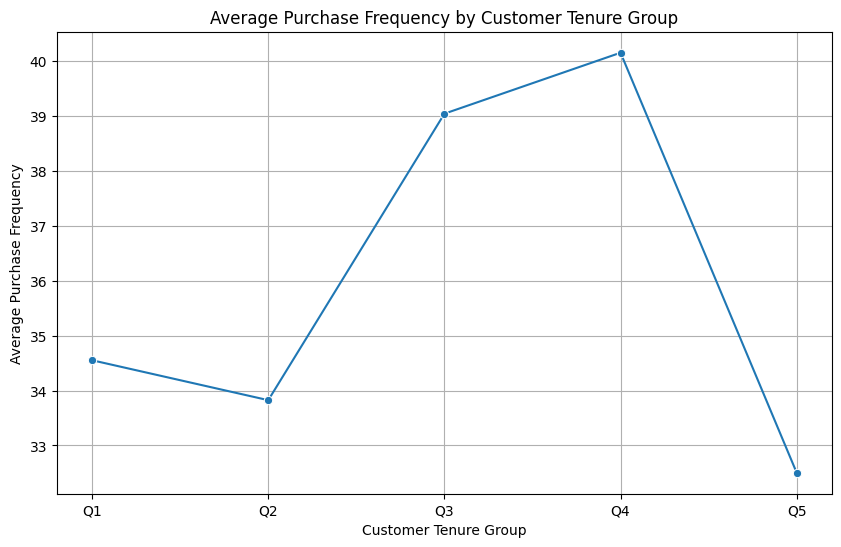

In [ ]:
# plot the above average_frequency_by_tenure data to visualise customer tenure and avg purchase frequency
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_frequency_by_tenure, x='Tenure_Group', y='Purchase_Frequency', marker='o')
plt.title('Average Purchase Frequency by Customer Tenure Group')
plt.xlabel('Customer Tenure Group')
plt.ylabel('Average Purchase Frequency')
plt.grid(True)
plt.show()

**Based on the analysis of customer purchase frequency by tenure group**:

**Group Q1 (1-11 months) and Group Q2 (12-22 months)**: 💡 We observe a lower average purchase frequency within these groups. This suggests customers are in the evaluation phase of their brand journey. To nurture these newer customers:

* Implement a robust Customer Feedback Initiative 🗣️ to understand their initial experiences and proactively address any concerns. This demonstrates a commitment to their satisfaction. ✅

* Offer targeted Incentives for Repeat Purchases, such as a small discount or a complimentary item 🎁, to encourage continued engagement and signal value. 💰

**Group Q3 (23-33 months) and Group Q4 (34-44 months)**: 💪 These groups exhibit a higher average purchase frequency, indicating strong customer satisfaction and loyalty.
 To capitalize on this momentum and maintain a strong retention rate.

* Leverage Personalized Product Recommendations 🎯 based on their purchase history to drive sales of complementary items and encourage exploration of new product categories. 🛍️

* Create Exclusive Deals and Offers ✨ tailored to their preferences to incentivize purchases of their favorite products and introduce them to new offerings. 💲
* Introduce VIP Treatment 🎉 and acknowledge their loyalty through special programs or early access to promotions. 🚀

* Launch a Customer Referral Program 🤝 with attractive incentives to leverage their advocacy and acquire new, high-quality customers. 💰

* Maintain open lines of communication through Feedback Mechanisms 🗣️ to gather insights for continuous improvement and address any emerging concerns. 💡

**Group Q5 (45-55 months)**:
* 📉 This group shows a decline in average purchase frequency, indicating decreased engagement and a weaker retention rate. Our objective is to re-engage these less responsive customers.

* Conduct a Win-Back Campaign 🎯 to understand the reasons for their decreased activity through targeted outreach and feedback collection. 🕵️‍♀️

* Deploy compelling Targeted Promotional Offers 💌 via email or other channels, featuring significant discounts, special festival deals, or exclusive promotions to stimulate their interest. 🎁

* Prioritize Issue Resolution 🛠️ by actively addressing any past concerns or negative experiences to rebuild trust and encourage a return to active purchasing. ✅

# Question 17 🤔📊📈📉

17. Analyze the relationship between **delivery charges and order behavior**. Are there opportunities to **optimize delivery pricing** to increase order quantities or revenue?💡💰

In [ ]:
# Calculate the number of unique transactions for each delivery charge amount.
df_sales_deliverycharges_data=df_sales_with_first_purchase.groupby(['Delivery_Charges'])['Transaction_ID'].nunique().reset_index()
df_sales_deliverycharges_data.sort_values(by='Transaction_ID',ascending=False,inplace=True)
df_sales_deliverycharges_data.columns=['Delivery_Charges','Number_of_Transactions']
df_sales_deliverycharges_data.head()

,Delivery_Charges,Number_of_Transactions
1,6.00,12562
4,6.50,8719
14,12.99,1091
49,19.99,455
7,8.70,264


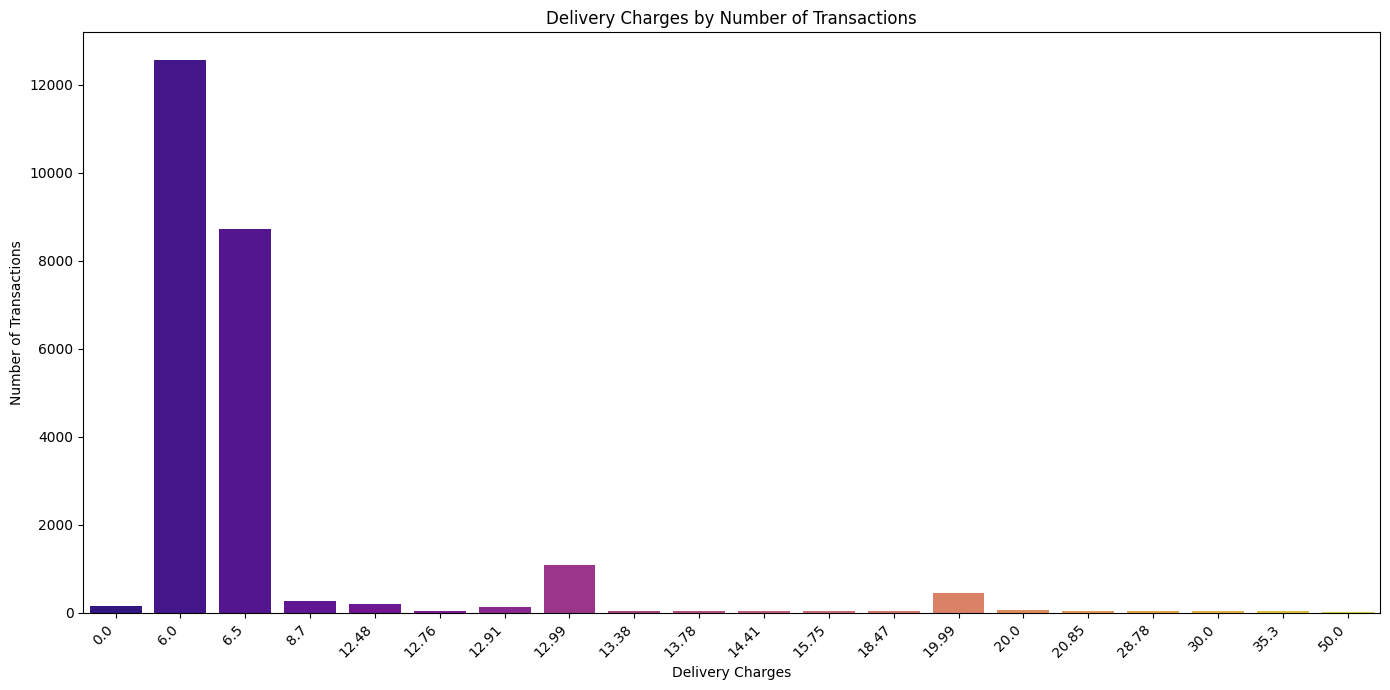

In [ ]:
# Generate plot for df_sales_deliverycharges_data for top 20 data
plt.figure(figsize=(14, 7))
sns.barplot(data=df_sales_deliverycharges_data.head(20), x='Delivery_Charges', y='Number_of_Transactions', palette='plasma')
plt.title('Delivery Charges by Number of Transactions')
plt.xlabel('Delivery Charges')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Group the sales data by 'Delivery_Charges' and calculate the total 'Quantity' sold for each charge amount.
# The results are sorted in descending order based on the total quantity sold.
df_sales_deliverycharges_quantity_data=df_sales_with_first_purchase.groupby(['Delivery_Charges'])['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)
df_sales_deliverycharges_quantity_data.head(10)

,Delivery_Charges,Quantity
1,6.00,79899
4,6.50,54262
14,12.99,10473
49,19.99,6638
11,12.48,5840
13,12.91,5255
202,85.33,1971
112,35.96,1524
16,13.38,1363
246,190.42,1183


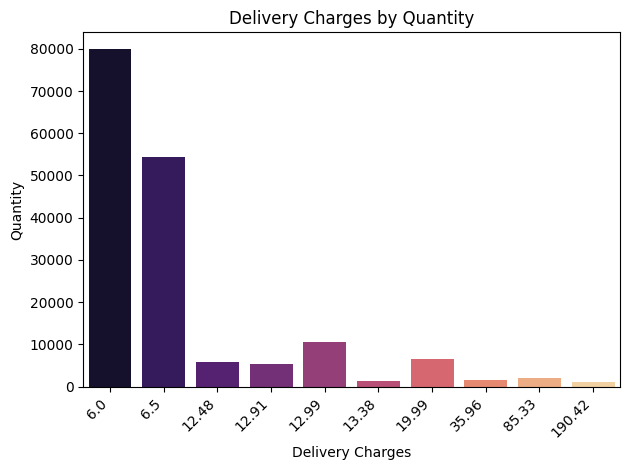

In [ ]:
# Generate a bar plot for 'Delivery_Charges' and 'Quantity' using the top 10 data
top_10_data = df_sales_deliverycharges_quantity_data.head(10)
sns.barplot(data=top_10_data, x='Delivery_Charges', y='Quantity',palette='magma')
plt.title('Delivery Charges by Quantity')
plt.xlabel('Delivery Charges')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate total sales for each delivery charge amount and sort in descending order
df_sales_deliverycharges_sales_data=df_sales_with_first_purchase.groupby(['Delivery_Charges'])['Total_Sales'].sum().reset_index().sort_values(by='Total_Sales',ascending=False)
df_sales_deliverycharges_sales_data.head(10)

,Delivery_Charges,Total_Sales
1,6.00,2075910.89
4,6.50,1614135.69
14,12.99,232082.37
49,19.99,114373.74
7,8.70,72316.15
11,12.48,41248.04
13,12.91,35644.60
0,0.00,19547.24
16,13.38,8348.94
229,130.46,8248.80


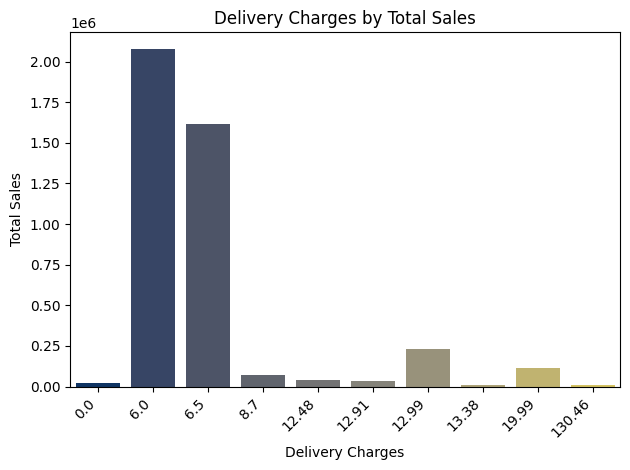

In [ ]:
# Generate a bar plot for 'Delivery_Charges' and 'Total Sales' using the top 10 data
top_10_data = df_sales_deliverycharges_sales_data.head(10)
sns.barplot(data=top_10_data, x='Delivery_Charges', y='Total_Sales',palette='cividis')
plt.title('Delivery Charges by Total Sales')
plt.xlabel('Delivery Charges')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Based on the **analysis of delivery charges** and **their impact on transactions**, quantity purchased, and revenue, it appears that setting delivery charges in the range of $6-$6.50 for other products holds the potential to increase revenue generation.

* 📈💰 This suggests that customers may be **more inclined** to complete transactions and purchase larger quantities when delivery costs are within this specific range.

* 📦✅ Implementing delivery charges in this bracket across a wider product range could capitalize on this **observed customer behavior** and contribute to overall revenue growth. 🌱🛒

# Question 18 🤔📊📈📉

18. Evaluate how taxes and delivery charges **influence customer spending** behavior. Are there opportunities to **adjust pricing strategies** to improve customer satisfaction and revenue?📊🚚

In [ ]:
# Merge online sales data with tax information based on 'Product_Category' and group by tax with respective to total sales
df_sales_tax_merged=pd.merge(df_sales_with_first_purchase,df_taxAmount,on='Product_Category')
df_sales_tax_merged_grp_tax=df_sales_tax_merged.groupby('GST')['Total_Sales'].sum().reset_index()
df_sales_tax_merged_grp_tax

,GST,Total_Sales
0,10%,2928107.26
1,12%,4637.32
2,18%,1032841.67
3,5%,705208.37


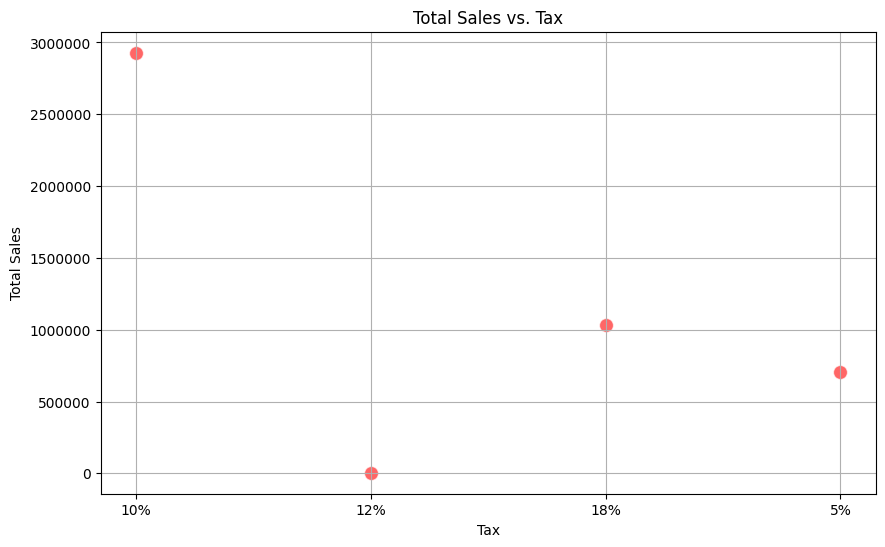

In [ ]:
# plot the above data to visualise tax vs total sales
plt.figure(figsize=(10, 6))
formatter = mticker.FormatStrFormatter('%.0f')
sns.scatterplot(data=df_sales_tax_merged_grp_tax, x='GST', y='Total_Sales', alpha=0.6,color='red', s=100)
plt.title('Total Sales vs. Tax')
plt.xlabel('Tax')
plt.ylabel('Total Sales')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()



In [ ]:
# Group by data by delivery charges with respective to Total Sales
df_sales_tax_merged=pd.merge(df_sales_with_first_purchase,df_taxAmount,on='Product_Category')
df_sales_tax_merged_deliverygrp=df_sales_tax_merged.groupby('Delivery_Charges')['Total_Sales'].sum().reset_index()
df_sales_tax_merged_deliverygrp.head(10)

,Delivery_Charges,Total_Sales
0,0.00,19547.24
1,6.00,2075910.89
2,6.46,461.86
3,6.48,425.20
4,6.50,1614135.69
5,6.51,1059.24
6,8.36,54.36
7,8.70,72316.15
8,8.91,15.80
9,11.10,285.50


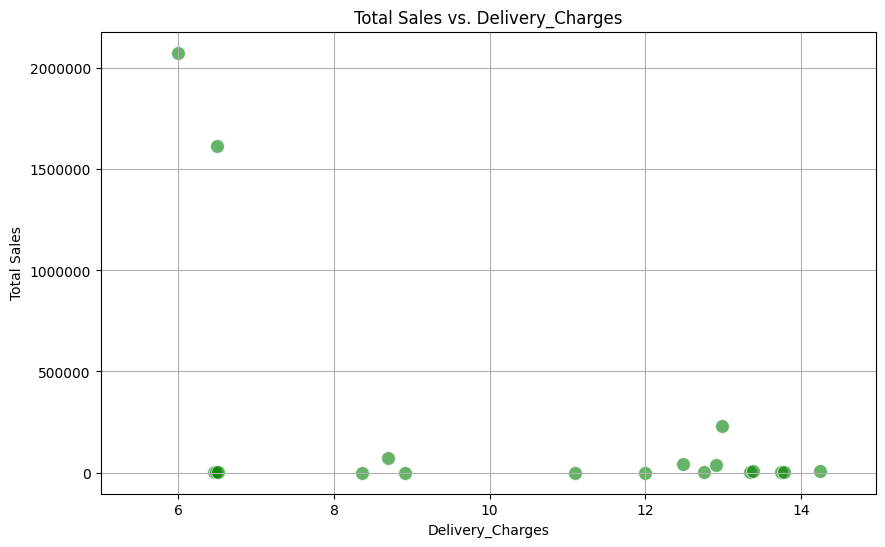

In [ ]:
# plot above data to visualise delivery charges vs total sales
plt.figure(figsize=(10, 6))
formatter = mticker.FormatStrFormatter('%.0f')
sns.scatterplot(data=df_sales_tax_merged_deliverygrp.head(20), x='Delivery_Charges', y='Total_Sales',alpha=0.6,color='green',s=100)
plt.title('Total Sales vs. Delivery_Charges')
plt.xlabel('Delivery_Charges')
plt.ylabel('Total Sales')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlim(5,)
plt.show()

**Strategic Threshold for Free Shipping**: 🚀 Define a purchase threshold. Any order exceeding this amount qualifies for complimentary shipping, incentivizing larger basket sizes and boosting overall sales.

**Enhance Transparency in Charges**: ✅ Implement clear and upfront communication regarding tax and delivery costs at every stage of the purchase journey. This builds trust and reduces cart abandonment due to unexpected fees.

**Tailored Delivery Benefits for Premium Subscribers**: ✨ Offer exclusive, adjusted delivery charges or even free shipping as a perk for Premium segment customers, further enhancing the value of their loyalty.

**Dynamic Pricing for Delivery**: 📈 Adjust delivery fees based on factors like real-time demand, chosen delivery speed, or even time of day. This allows for optimized logistics and can cater to customer urgency while maintaining profitability.

# Question 19 🤔📊📈📉

19. Identify s**easonal trends** in sales by category and location. How can the company prepare for peak and off-peak seasons to **maximize revenue**?💪📉:

In [ ]:
# Group by Location and Year_Month and calculate the sum of Total_Sales to find the seasonal sales by location.
df_seasonal_sales_by_location=df_sales_with_first_purchase.groupby(['Location','Year_Month'])['Total_Sales'].sum().reset_index()
df_seasonal_sales_by_location.head()

,Location,Year_Month,Total_Sales
0,California,2019-01,150241.63
1,California,2019-02,89727.46
2,California,2019-03,99243.75
3,California,2019-04,121139.09
4,California,2019-05,86602.49


In [ ]:
# Group the sales data by product category and month to analyze seasonal sales patterns
df_seasonal_sales_by_product_category=df_sales_with_first_purchase.groupby(['Product_Category','Year_Month'])['Total_Sales'].sum().reset_index()
df_seasonal_sales_by_product_category.head()

,Product_Category,Year_Month,Total_Sales
0,Accessories,2019-01,51.57
1,Accessories,2019-03,59.99
2,Accessories,2019-04,166.96
3,Accessories,2019-05,141.14
4,Accessories,2019-06,207.73


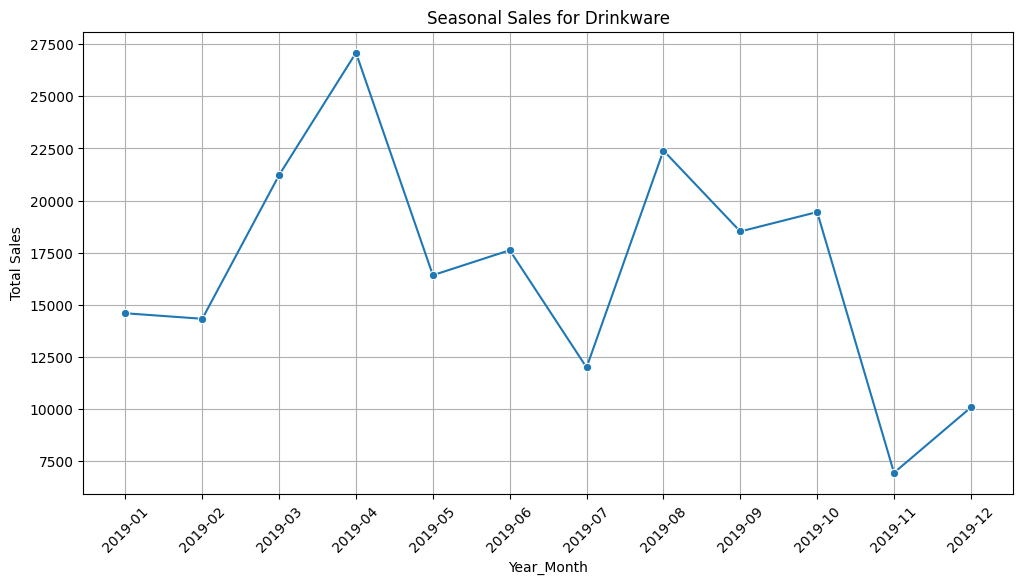

In [ ]:
# Plot lineplot to visualize the trend for product category per month
# Get the unique product category
product_category = df_seasonal_sales_by_product_category['Product_Category'].unique().tolist()
select_productCategory = 'Drinkware' #@param ['Accessories','Android','Apparel','Backpacks','Bags','Bottles','Drinkware','Fun', 'Gift Cards', 'Google','Headgear','Housewares','Lifestyle','More Bags','Nest','Nest-Canada','Nest-USA','Notebooks & Journals','Office','Waze'] {allow-input: true}
# Filter data for the specified product category
df_seasonal_sales_filtered = df_seasonal_sales_by_product_category[df_seasonal_sales_by_product_category['Product_Category'] == select_productCategory]
# Generate line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_seasonal_sales_filtered, x=df_seasonal_sales_filtered['Year_Month'].astype(str), y='Total_Sales', marker='o')
plt.title(f'Seasonal Sales for {select_productCategory}')
plt.xlabel('Year_Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

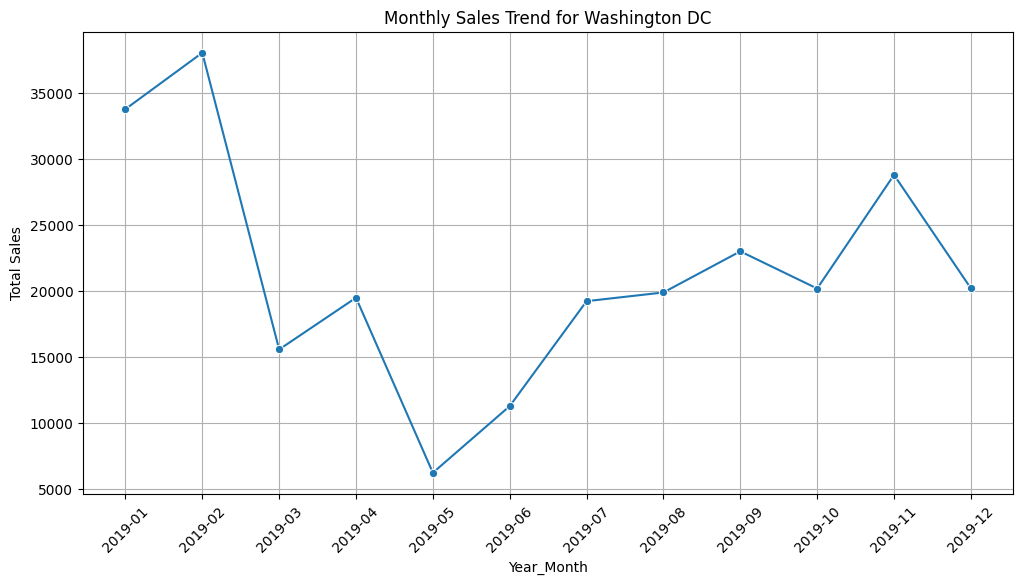

In [ ]:
# Plot to visualize Total sales per month by location.
# Get unique locations for the filter
locations = df_seasonal_sales_by_location['Location'].unique().tolist()

# Create a dropdown menu for location selection
selected_location = 'Washington DC' #@param ["Chicago", "California", "New Jersey", "New York", "Washington DC"] {allow-input: true}

# Filter the data based on the selected location
df_seasonal_sales_by_location_filtered = df_seasonal_sales_by_location[df_seasonal_sales_by_location['Location'] == selected_location].copy()

# Plotting the line plot for the filtered location
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_seasonal_sales_by_location_filtered, x=df_seasonal_sales_by_location_filtered['Year_Month'].astype(str), y='Total_Sales', marker='o')
plt.title(f'Monthly Sales Trend for {selected_location}')
plt.xlabel('Year_Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

* **Overall Seasonal Peaks** 📈: Analysis of the plot reveals strong revenue peaks in January, July, August, October, and November. These months represent key periods for potential sales maximization.

* **Category-Specific Seasonality** 📚✏️: We observe distinct seasonal trends for specific product categories. For instance, "Notebooks and Journals" peak in April and August, aligning with typical school seasons. Identifying similar peak periods for other categories allows for targeted strategies.

* **Peak Season Windows** 🗓️: Most revenue peaks occur within the ranges of February-April and July-November. This highlights crucial windows for intensified sales and marketing efforts.

* **Capitalizing on Peak Season** 💪💰: **To capitalize on these high-demand periods, the company should implement the following strategies:**

* **Inventory Optimization** 📦: Ensure adequate stock levels of high-performing products to prevent stockouts and meet customer demand.

* **Enhanced Customer Support** 🤝📞: Increase sales personnel and ensure customer helplines are fully staffed and active to handle increased volume and resolve issues efficiently.

* **Strategic Promotions** ✨💸: Offer targeted discounts and promotions during peak months to incentivize purchases and boost revenue generation.

* **Navigating Off-Season Periods** 🤔💡: **During off-season periods, the company can strategically utilize this time for:**

* **Inventory Management** 📉🛒: Implement clearance sales or discounts on older or slow-moving inventory to free up capital and warehouse space.

* **Operational Enhancement** 🛠️👩‍🏫: Conduct necessary maintenance, provide employee training, and focus on strategic planning to improve overall efficiency and prepare for future peak seasons.

# Question 20 🤔📊📈📉

20. Analyze daily **sales trends** to identify **high-performing** and **low-performing** days. What strategies can be implemented to boost sales on slower days?🤔💡

In [ ]:
# Analyze sales performance by day of the week.
df_onlineSales['Transaction_Date'] = pd.to_datetime(df_onlineSales['Transaction_Date'])

# Extract the day of the week (0=Monday, 6=Sunday)
df_onlineSales['Day_of_Week'] = df_onlineSales['Transaction_Date'].dt.dayofweek

# Group by day of the week and sum total sales
total_sales_by_day = df_onlineSales.groupby('Day_of_Week')['Total_Sales'].sum().reset_index()

# Map numerical day of week to names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
total_sales_by_day['Day_of_Week_Name'] = total_sales_by_day['Day_of_Week'].map(day_names)

# Sort by day of the week
total_sales_by_day = total_sales_by_day.sort_values('Day_of_Week')
total_sales_by_day


,Day_of_Week,Total_Sales,Day_of_Week_Name
0,0,365626.90,Monday
1,1,396819.65,Tuesday
2,2,826622.00,Wednesday
3,3,840433.85,Thursday
4,4,872004.86,Friday
5,5,673068.03,Saturday
6,6,696219.33,Sunday


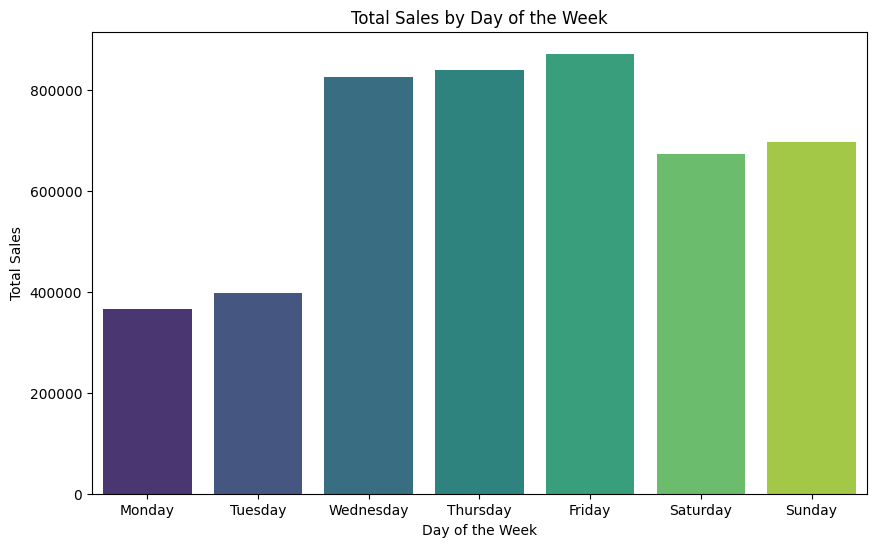

In [ ]:
# plot to visualize the total sales vs day
plt.figure(figsize=(10, 6))
formatter = mticker.FormatStrFormatter('%.0f')
sns.barplot(data=total_sales_by_day, x='Day_of_Week_Name', y='Total_Sales', palette='viridis')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

**Based on the plot, we've identified a clear pattern in sales performance across the week:**

* 📈 **Peak Performance**: Wednesdays, Thursdays, and Fridays consistently exhibit the highest sales volume.
* 📊 **Moderate Performance**: Saturdays and Sundays show moderate sales.
* 📉 **Lower Performance**: Mondays and Tuesdays are the lowest-performing days in terms of sales.

**To strategically address these fluctuations and optimize revenue throughout the week, we propose the following actions:**

* 🎯 **Targeted Campaigns on Low-Performing Days**: To boost sales on Mondays and Tuesdays, we can implement targeted marketing initiatives.
 * Consider launching promotions like "**Tuesday Steals**" or offering "**Bumper Discounts**" specifically on these days to incentivize customer engagement and drive traffic.
  *staffing levels to align with anticipated customer activity. By optimizing staffing on Mondays and Tuesdays, we can ensure efficient operations while maximizing resource allocation during peak periods.